<br>
<h1 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;"> DIABETES PREDICTION <br>& <br>DATA STORY-TELLING</h1>

<br>
<br>
<br>
<div class = 'image'> <img style="float:center; border:5px solid grey; width:95%; margin: 20px; " align=center src = https://res.cloudinary.com/grohealth/image/upload/v1581695681/DCUK/Content/causes-of-diabetes.png> 
</div>
<br>
<br>

[Source: diabetes.co.uk](https://www.diabetes.co.uk/diabetes-causes.html)
<br>
<br>


<br>
<h1 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">PREFACE</h1>
<p style = "text-align:center;">
This is a Story of a Woman named Heart. She was a Data Analyst but was very afraid of doctors.<br>She was very fond of sweets but she had diabetes running in her family through generations. <br>One day she found a house made of sweets, she rushed towards the chocolate house let alone <br>thinking even once.She lost all her senses, and consumed a lot of sweets in no time. <br>She kept eating nothing could stop her.Later, her friends, brain and instestine, stopped <br>her somehow but now she was afraid of having diabetes but the doctor lived far in the city, <br>she now rushed towards her home and asked her father Mr. Muscles to take her to a hospital but <br>Mr. Muscles was not feeling well and she was too anxious to wait. She suddenly <br>got the idea and asked her father if they had all the family's diabetes records. She rushed to her mother Mrs. OCD <br>who had a weird thing for organisation and cleaning, well that suddenly came into use. Now, Miss. Heart<br> who is a Data Analyst was sure that she will solve this mystery called Diabetes.</p>

<br>
<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;"> 1. START</h1>

Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood sugar. Hyperglycaemia, or raised blood sugar, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.<br>
 try to Visualize the key factors(Pregnancy,Glucose etc) that may/ maynot lead to Diabetes.
Here, in this notebook we will Create infer structures and patterns by visualising the data, finding the <br>pattern followed by the data with best possible model and fine-tuned hyperparameters.



<br>
<h3 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">PROBLEM STATEMENT:</h3>

The population for this study was the Pima Indian population near Phoenix, Arizona. The population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes.
<hr>
Given this medical data,we should make better predictions so as to make peoples/doctors lives easier.<br>
We can learn from the data found on <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">UCI Machine Learning Repository</a> which contains data on female patients at least 21 years old of Pima Indian heritage

We have 768 instances and the following 8 attributes:

1. Number of times pregnant (preg)<br>
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plas)<br>
3. Diastolic blood pressure in mm Hg (pres)<br>
4. Triceps skin fold thickness in mm (skin)<br>
5. 2-Hour serum insulin in mu U/ml (insu)<br>
6. Body mass index measured as weight in kg/(height in m)^2 (mass)<br>
7. Diabetes pedigree function (pedi)<br>
8. Age in years (age)<br>

<h3 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">1.1 IMPORTING LIBRARIES:</h3>

In [1]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd
import time

#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline




#Data Preprocessing Tools
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder,
                                   MinMaxScaler)
from sklearn import metrics
from sklearn.model_selection import train_test_split


#Metrics
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)

# Stats
from scipy.stats import kurtosis, skew

# model algorithams
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis)

In [2]:
# loading data
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv', delimiter = ',', encoding = 'utf-8')
print(f'We have {df.shape[0]} instances and the following {df.shape[1]} attributes:')
df.head(5)

We have 768 instances and the following 9 attributes:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">1.2 DESCRIPTIVE STATISTICS
</h3>

### Simple Statistics

In [3]:
df.describe().T.style.set_table_attributes("style='display:inline'").bar(color='#C0C0C0')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


### Visualizing Null Data

In [4]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

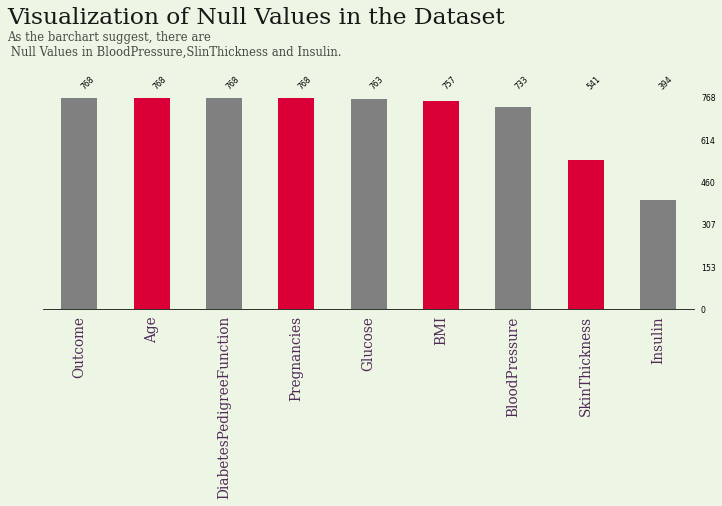

In [5]:
color = ['grey','#DA0037']*4
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('#EDF6E5')
ax.set_facecolor('#EDF6E5')


msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')

ax.text(-1,1.35,'Visualization of Null Values in the Dataset',{'font': 'Serif', 'Size': 24,  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'As the barchart suggest, there are \n Null Values in BloodPressure,SlinThickness and Insulin.',{'font': 'Serif', 'Size': 12,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'Serif', 'Size': 14,'weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

fig.show()

### Null accuracy Score

In [6]:
null_acc = round (max(df.Outcome.values.mean(), 1 - df.Outcome.values.mean()), 2)

print(f'\nNull Accuracy Score: {null_acc*100}% \n' )

print('This is the Baseline accuracy our model we need to cross.\n')


Null Accuracy Score: 65.0% 

This is the Baseline accuracy our model we need to cross.



<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">2. Data Pre-Processing
</h1>

### Median Imputation
**Helper Functions:**

In [7]:
def impute_median(var,data):   
    imputed_data = data[data[var].notnull()]
    imputed_data = imputed_data[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return imputed_data

### Feature Engineering for Data Visualization

In [8]:
missing_val_columns = ['BloodPressure','SkinThickness','Insulin','Glucose','BMI']
for col in missing_val_columns:
    med0,med1 = impute_median(col,df)[col]
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col]=med0
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col]=med1

In [9]:
df['bmi_cat'] = pd.cut(df['BMI'], bins = [-1, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['Age'], bins = [-1, 45,60,200], labels = ['Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['Glucose'], bins = [-1,90,160,199], labels = ['Low', 'Normal', 'High'])
df['insulin_cat'] = pd.cut(df['Insulin'], bins = [-1,22,79,900], labels = ['Low', 'Normal', 'High'])
df['bp_cat'] = pd.cut(df['BloodPressure'], bins = [-1,80,115,130], labels = ['Normal', 'High','Critically High'])

<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">3. Exploratory Data Analysis
</h1>

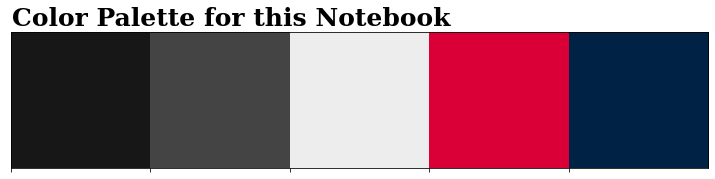

In [10]:
# color palette for visualizations
colors = ['#171717','#444444','#EDEDED','#DA0037','#002244']
palette = sns.color_palette( palette = colors)

sns.palplot(palette, size =2.5)
plt.text(-0.49,-0.55,'Color Palette for this Notebook', {'font':'serif', 'size':25, 'weight':'bold'})
plt.show()



<h3 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">3.1 Data Imbalance
</h3>

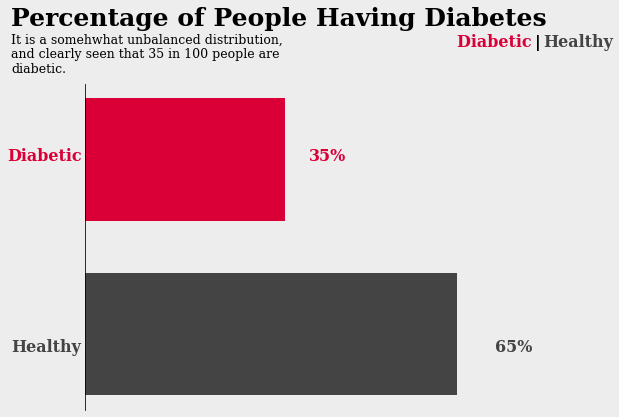

In [11]:
x = pd.DataFrame(df.groupby(['Outcome']).Outcome.count())

fig , ax = plt.subplots(figsize=(7,6))
ax.barh([1], x.Outcome[1], height=0.7, color= colors[3])
ax.barh([0], x.Outcome[0], height=0.7, color= colors[1])

fig.patch.set_facecolor(colors[2])
ax.set_facecolor(colors[2])

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.text(-100,-0.1, 'Healthy',{'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':colors[1]})
plt.text(550,-0.1, '65%',{'font':'Serif','weight':'bold' ,'size':'16','color':colors[1]})
plt.text(-105,1, 'Diabetic', {'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':colors[3]})
plt.text(300,1, '35%',{'font':'Serif', 'weight':'bold','size':'16','color':colors[3]})

plt.text(-100,1.77, 'Percentage of People Having Diabetes' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'})
plt.text(500,1.65, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
plt.text(605,1.65, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
plt.text(615,1.65, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[1]})
plt.text(-100,1.5, 'It is a somehwhat unbalanced distribution,\nand clearly seen that 35 in 100 people are\ndiabetic.', 
        {'font':'Serif', 'size':'12.5','color': 'black'})
plt.show()

<h1 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">3.2 Univariate Analysis
</h1>

<h3 style = "font-size:30px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">3.2.1 Univariate Analysis of Continuous Variables
</h3>

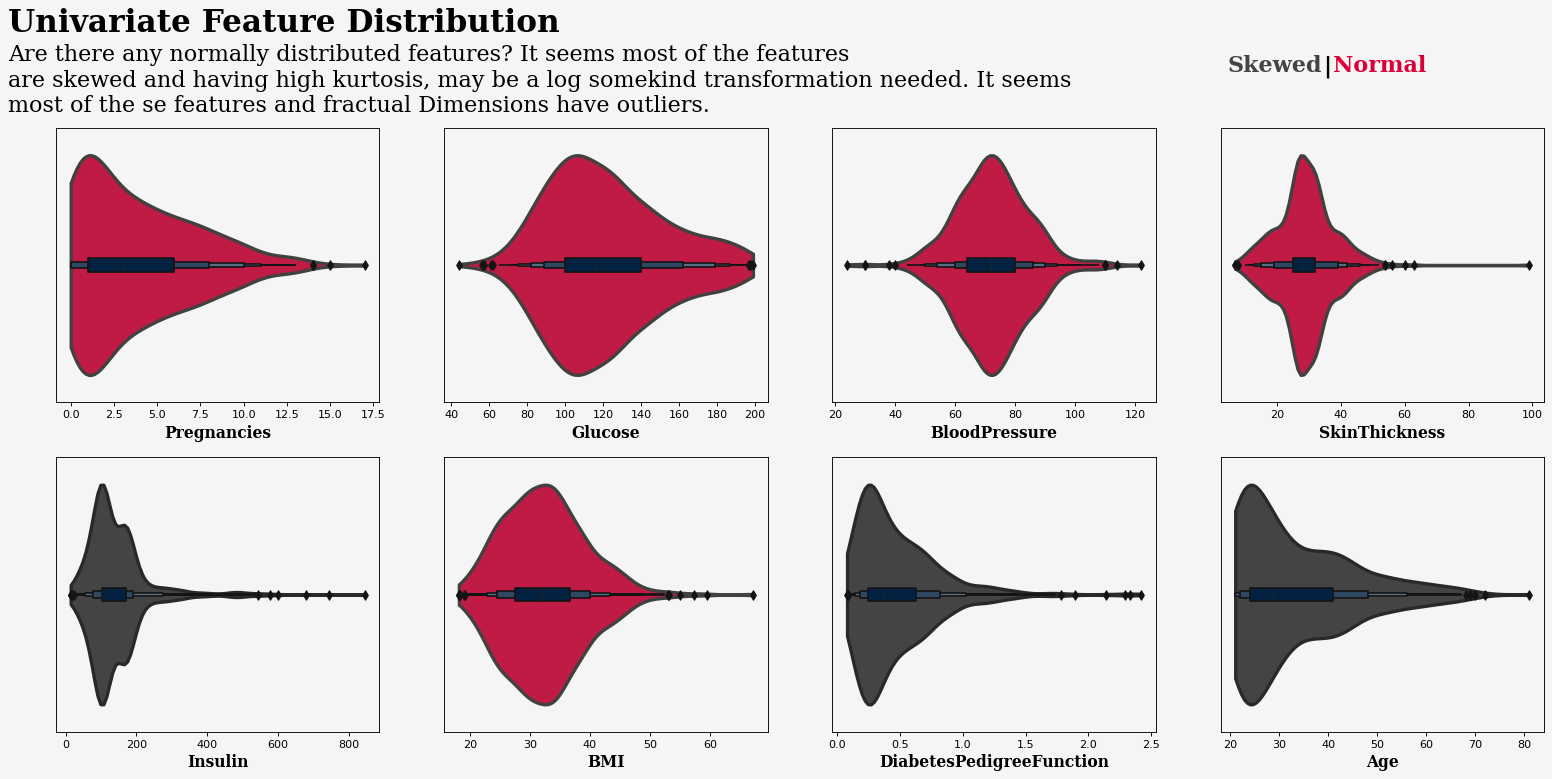

In [12]:
fig,ax = plt.subplots(nrows = 2, ncols = 4, figsize = (24,10),dpi=80)
fig.patch.set_facecolor('#f6f5f5')
axes = ax.ravel()

feat_df = df.iloc[:,:8]

for col,ax in zip(feat_df.columns,axes):
    
    # skewness
    if skew(feat_df[col])>1:
        color = colors[1]
    else:
        color = colors[3]
    
    sns.violinplot(feat_df[col], ax =ax,cut =0, 
                   color = color,inner = None,
                   alpha = 0.6,linewidth = 3,edgecolor = 'solidblack', saturation =0.75 )
    sns.boxenplot(x = df[col], ax = ax, saturation = 0.9,palette =[colors[4]],width=0.05)
    
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(True)
    ax.axes.set_xlabel(col,{'font':'serif','size':14, 'weight':'bold'}, alpha = 1)
    ax.set_facecolor('#f6f5f5')



## titles and text
fig.text(0.1,1,'Univariate Feature Distribution', {'font':'serif','size':28, 'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,'''Are there any normally distributed features? It seems most of the features
are skewed and having high kurtosis, may be a log somekind transformation needed. It seems
most of the se features and fractual Dimensions have outliers.  ''',{'font':'serif','size':20, 'weight':'normal'}, alpha = 1)    

fig.text(0.735,0.95, "Skewed",{'font':'serif','size':20, 'weight':'bold', 'color':colors[1]})
fig.text(0.785,0.95, '|',{'font':'serif','size':20, 'weight':'bold'})
fig.text(0.79,0.95, "Normal",{'font':'serif','size':20, 'weight':'bold','color':colors[3]})

fig.show()

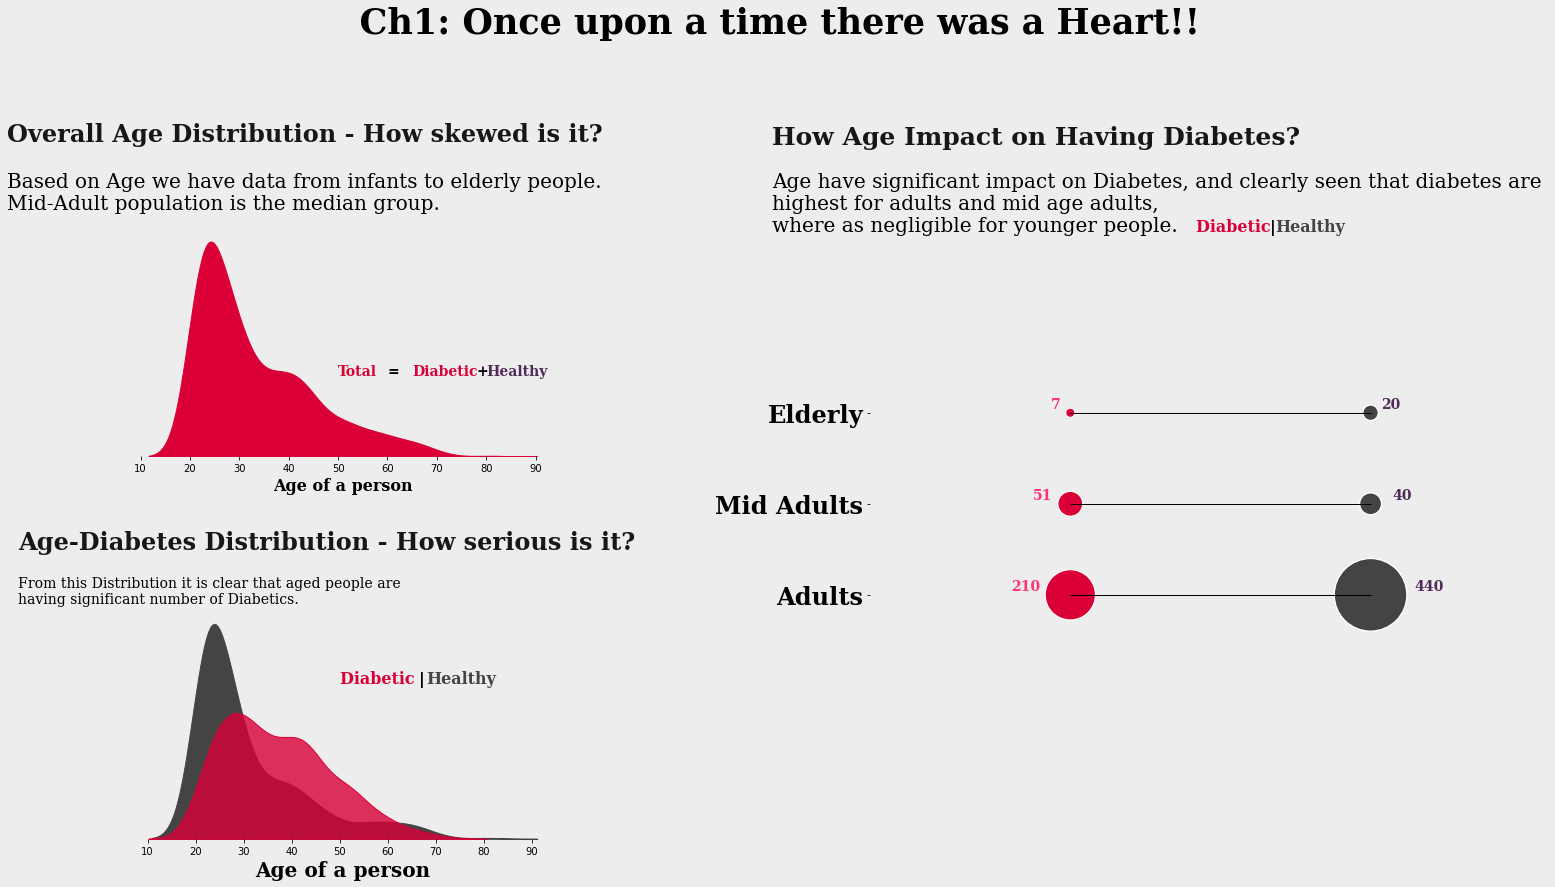

In [13]:
fig = plt.figure(figsize=(24,14))

grid = fig.add_gridspec(10,24)
grid.update(wspace = 1, hspace = 0.05)

ax1 = fig.add_subplot(grid[1:7,13:])
ax2 = fig.add_subplot(grid[1:4,0:8])
ax3 = fig.add_subplot(grid[6:9,0:8])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor(colors[2])
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
fig.patch.set_facecolor(colors[2])

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

diabetic_age = df[df['Outcome'] == 1].age_cat.value_counts()
healthy_age = df[df['Outcome'] == 0].age_cat.value_counts()

ax1.hlines(y = ['Adults', 'Mid Adults', 'Elderly'], xmin = [420,420,420 ], 
          xmax = 1800, color = 'black',**{'linewidth':1})
sns.scatterplot(y = diabetic_age.index, x = [420,420,420], s = diabetic_age.values*12, color = colors[3], ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_age.index, x = 1800, s = healthy_age.values*12, color = colors[1], ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 2250)
ax1.set_ylim(ymin = -1,ymax = 4)

ax1.set_yticklabels( labels = ['Adults', 'Mid Adults', 'Elderly'],fontdict = {'font':'Serif', 'fontsize':24,'fontweight':'bold', 'color':'black'})

ax1.text(-950,4.95, 'How Age Impact on Having Diabetes?' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1000,4.0, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
ax1.text(1340,4.0, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1360,4.0, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[1]})
ax1.text(-950,4.0, 'Age have significant impact on Diabetes, and clearly seen that diabetes are \nhighest for adults and mid age adults, \nwhere as negligible for younger people.', 
        {'font':'Serif', 'size':20,'color': 'black'})

ax1.text(150,0.05, diabetic_age.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(2000,0.05, healthy_age.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(250,1.05, diabetic_age.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1900,1.05, healthy_age.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(330,2.05, diabetic_age.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1850,2.05, healthy_age.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})



# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'Age', ax = ax2, shade = True, color = colors[3], alpha = 1, )
ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.074,'Overall Age Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax2.text(-17,0.058, 'Based on Age we have data from infants to elderly people.\nMid-Adult population is the median group.', 
        {'font':'Serif', 'size':20,'color': 'black'})
ax2.text(50,0.019, 'Total',{'font':'Serif', 'size':'14','color': colors[3],'weight':'bold'})
ax2.text(60,0.019, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(65,0.019, 'Diabetic',{'font':'Serif', 'size':'14','color': colors[3],'weight':'bold'})
ax2.text(78,0.019, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(80,0.019, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of Diabetics


sns.kdeplot(data = df[df['Outcome'] == 0], x = 'Age',ax = ax3, shade = True,  alpha = 1, color = colors[1])
sns.kdeplot(data = df[df['Outcome'] == 1], x = 'Age',ax = ax3, shade = True,  alpha = 0.8, color = colors[3])

ax3.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 20})

ax3.text(-17,0.08,'Age-Diabetes Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(-17,0.065,'From this Distribution it is clear that aged people are \nhaving significant number of Diabetics.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(50,0.043, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
ax3.text(66.5,0.043, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(68,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[1]})

fig.text(0.23,1,'    Ch1: Once upon a time there was a Heart!!',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()

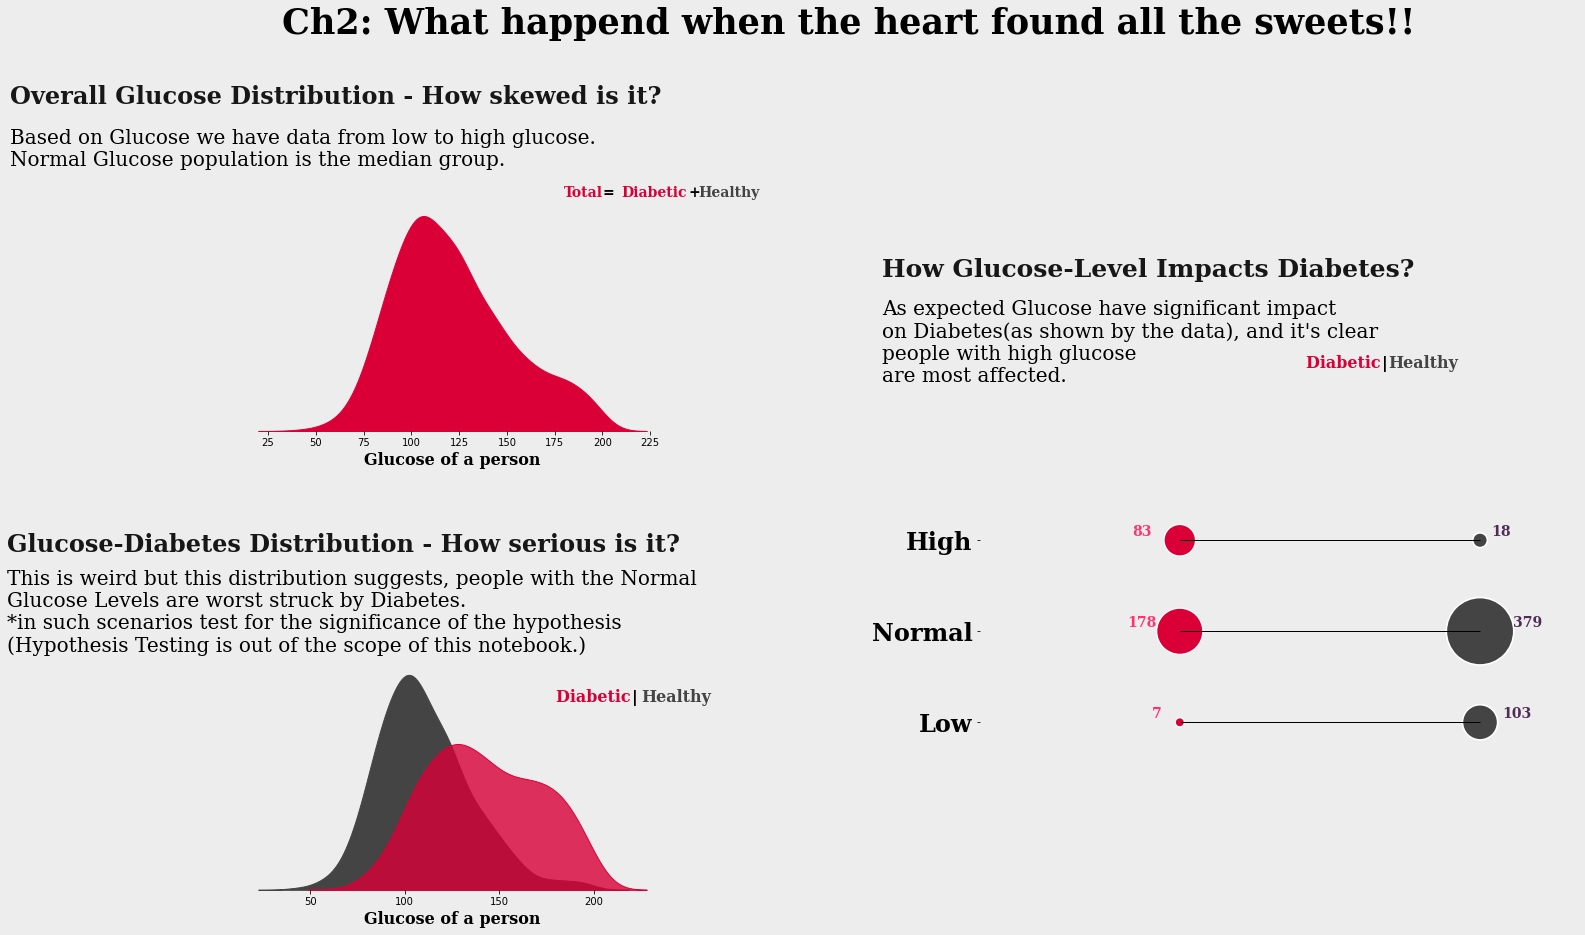

In [14]:
fig = plt.figure(figsize=(24,14))

grid = fig.add_gridspec(10,24)
grid.update(wspace = 1, hspace = 0.05)

ax1 = fig.add_subplot(grid[2:8,13:])
ax2 = fig.add_subplot(grid[0:3,0:8])
ax3 = fig.add_subplot(grid[6:9,0:8])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor(colors[2])
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
fig.patch.set_facecolor(colors[2])

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

diabetic_glu = df[df['Outcome'] == 1].glucose_cat.value_counts()
healthy_glu = df[df['Outcome'] == 0].glucose_cat.value_counts()

ax1.hlines(y = ['Low', 'Normal', 'High'], xmin = [420,420,420 ], 
          xmax = 1800, color = 'black',**{'linewidth':1})
sns.scatterplot(y = diabetic_glu.index, x = [420,420,420], s = diabetic_glu.values*12, color = colors[3], ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_glu.index, x = 1800, s = healthy_glu.values*12, color = colors[1], ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 2250)
ax1.set_ylim(ymin = -1,ymax = 4)

ax1.set_yticklabels( labels = ['Low', 'Normal', 'High'],fontdict = {'font':'Serif', 'fontsize':24,'fontweight':'bold', 'color':'black'})

ax1.text(-950,4.9, 'How Glucose-Level Impacts Diabetes?' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1000,3.9, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
ax1.text(1350,3.9, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1380,3.9, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[1]})
ax1.text(-950,3.5, 'As expected Glucose have significant impact \non Diabetes(as shown by the data), and it\'s clear\npeople with high glucose \nare most affected.\n ', 
        {'font':'Serif', 'size':'20','color': 'black'})

ax1.text(290,0.05, diabetic_glu['Low'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1900,0.05, healthy_glu['Low'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(180,1.05, diabetic_glu['Normal'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1950,1.05, healthy_glu['Normal'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(200,2.05, diabetic_glu['High'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1850,2.05, healthy_glu['High'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})



# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'Glucose', ax = ax2, shade = True, color = colors[3], alpha = 1, )
ax2.set_xlabel('Glucose of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-110,0.021,'Overall Glucose Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax2.text(-110,0.017, 'Based on Glucose we have data from low to high glucose.\nNormal Glucose population is the median group.', 
        {'font':'Serif', 'size':20,'color': 'black'})
ax2.text(180,0.015, 'Total',{'font':'Serif', 'size':'14','color': colors[3],'weight':'bold'})
ax2.text(200,0.015, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(210,0.015, 'Diabetic',{'font':'Serif', 'size':'14','color': colors[3],'weight':'bold'})
ax2.text(245,0.015, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(250,0.015, 'Healthy',{'font':'Serif', 'size':'14','color': colors[1],'weight':'bold'})



# distribution plots with hue of Diabetics


sns.kdeplot(data = df[df['Outcome'] == 0], x = 'Glucose',ax = ax3, shade = True,  alpha = 1, color = colors[1])
sns.kdeplot(data = df[df['Outcome'] == 1], x = 'Glucose',ax = ax3, shade = True,  alpha = 0.8, color = colors[3])

ax3.set_xlabel('Glucose of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-110,0.027,'Glucose-Diabetes Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(-110,0.019,'This is weird but this distribution suggests, people with the Normal \nGlucose Levels are worst struck by Diabetes.\n*in such scenarios test for the significance of the hypothesis\n(Hypothesis Testing is out of the scope of this notebook.)', {'font':'Serif', 'color': 'black', 'size':20})
ax3.text(180,0.015, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
ax3.text(220,0.015, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(225,0.015, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[1]})

fig.text(0.25,1.05,'',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()

fig.text(0.15,1.05,'Ch2: What happend when the heart found all the sweets!!',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()

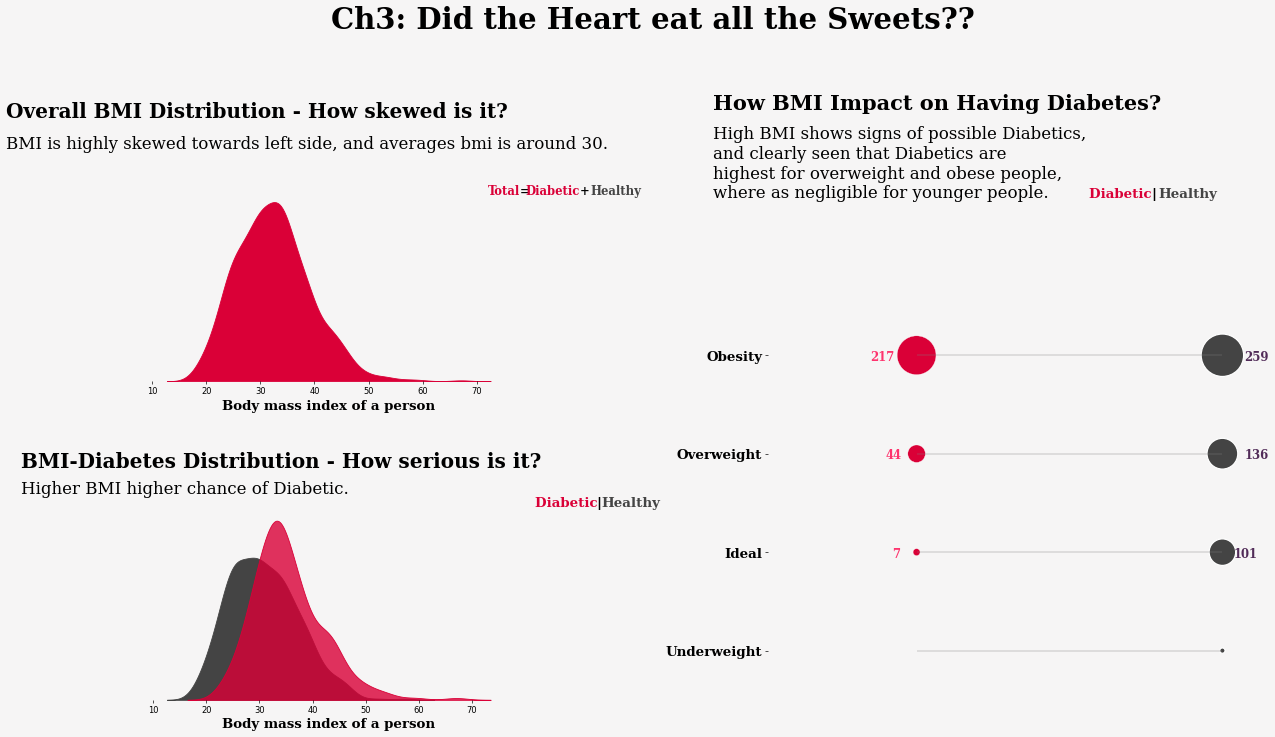

In [15]:
fig = plt.figure(figsize = (24,14),dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot
ax1 = fig.add_subplot(gs[2:9,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_xlim(xmin = -250,xmax = 2000)
ax1.set_ylim(ymin = -1,ymax =3.5)

# dumbbell plot of diabetes and healthy people

diabetic_bmi = df[df['Outcome'] == 1].bmi_cat.value_counts()
healthy_bmi = df[df['Outcome'] == 0].bmi_cat.value_counts()

ax1.hlines(y = ['Obesity', 'Overweight', 'Ideal', 'Underweight'], xmin = 420, 
          xmax = 1800, color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = diabetic_bmi.index, x = 420, s = diabetic_bmi.values*10, color = colors[3], ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_bmi.index, x = 1800, s = healthy_bmi.values*10, color = colors[1], ax= ax1, alpha = 1)

ax1.set_yticklabels( labels = ['Obesity', 'Overweight', 'Ideal', 'Underweight'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-500,-2.5, 'How BMI Impact on Having Diabetes?' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'})
ax1.text(1200,-1.6, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
ax1.text(1480,-1.6, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1510,-1.6, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[1]})
ax1.text(-500,-1.6, 'High BMI shows signs of possible Diabetics, \nand clearly seen that Diabetics are \nhighest for overweight and obese people, \nwhere as negligible for younger people.', 
        {'font':'Serif', 'size':20,'color': 'black'})



ax1.text(210,0.05, diabetic_bmi.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1900,0.05, healthy_bmi.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(280,1.05, diabetic_bmi.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1900,1.05, healthy_bmi.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(310,2.05, diabetic_bmi.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1850,2.05, healthy_bmi.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})



# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'BMI', ax = ax2, shade = True, color = colors[3], alpha = 1, )
ax2.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.085,'Overall BMI Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24})
ax2.text(-17,0.075, 'BMI is highly skewed towards left side, and averages bmi is around 30.', 
        {'font':'Serif', 'size':20,'color': 'black'})
ax2.text(72,0.06, 'Total',{'font':'Serif', 'size':'14','color': colors[3],'weight':'bold'})
ax2.text(78,0.06, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(79,0.06, 'Diabetic',{'font':'Serif', 'size':'14','color': colors[3],'weight':'bold'})
ax2.text(89,0.06, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(91,0.06, 'Healthy',{'font':'Serif', 'size':'14','color': colors[1],'weight':'bold'})


# distribution plots with hue of Diabetics


sns.kdeplot(data = df[df['Outcome'] == 0], x = 'BMI',ax = ax3, shade = True,  alpha = 1, color = colors[1] )
sns.kdeplot(data = df[df['Outcome'] == 1], x = 'BMI',ax = ax3, shade = True,  alpha = 0.8, color = colors[3])

ax3.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-15,0.09,'BMI-Diabetes Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})
ax3.text(-15,0.08,'Higher BMI higher chance of Diabetic.', {'font':'Serif', 'color': 'black', 'size':20})
ax3.text(82,0.075, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
ax3.text(93.5,0.075, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(94.5,0.075, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[1]})

fig.text(0.25,1,'Ch3: Did the Heart eat all the Sweets??',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()

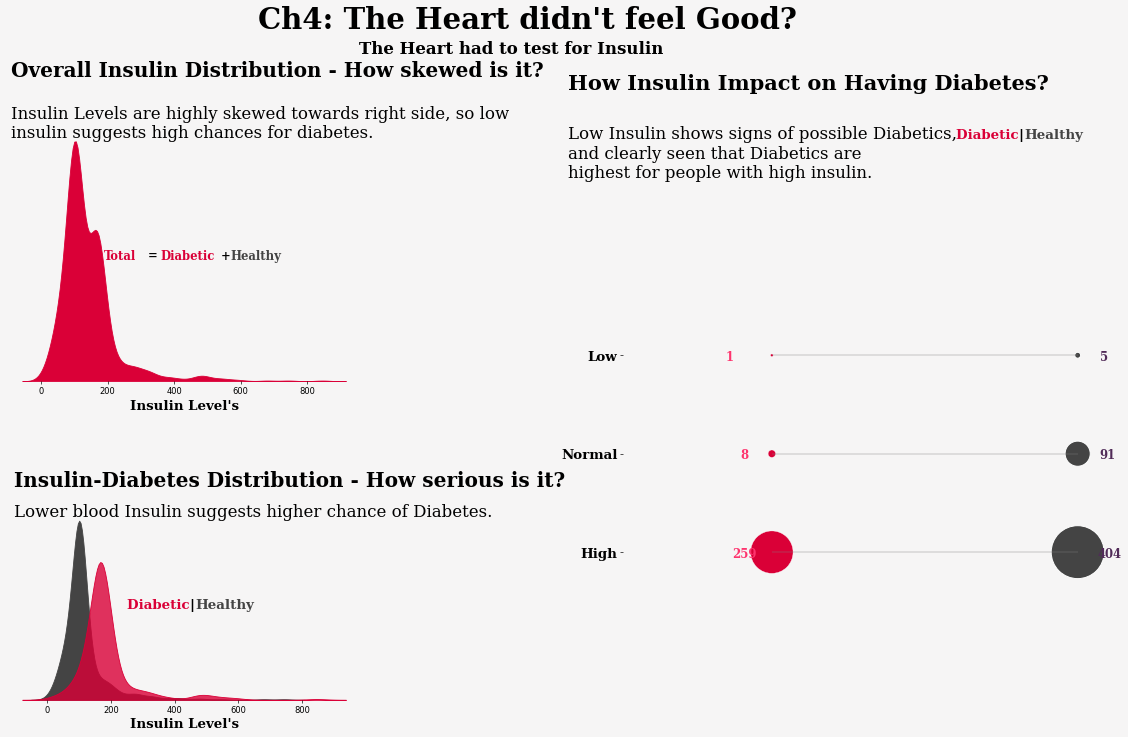

In [16]:
fig = plt.figure(figsize = (24,14),dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[0:4,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot
ax1 = fig.add_subplot(gs[2:9,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_xlim(xmin = -250,xmax = 2000)
ax1.set_ylim(ymin = -1,ymax =3.5)

# dumbbell plot

diabetic_insulin = df[df['Outcome'] == 1].insulin_cat.value_counts()
healthy_insulin = df[df['Outcome'] == 0].insulin_cat.value_counts()

ax1.hlines(y = ['Low', 'Normal', 'High'], xmin = 420, 
          xmax = 1800, color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = diabetic_insulin.index, x = 420, s = diabetic_insulin.values*10, color = colors[3], ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_insulin.index, x = 1800, s = healthy_insulin.values*10, color = colors[1], ax= ax1, alpha = 1)

ax1.set_yticklabels( labels = ['Low', 'Normal', 'High'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-500,-2.7, 'How Insulin Impact on Having Diabetes?' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'})
ax1.text(1250,-2.2, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
ax1.text(1530,-2.2, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1560,-2.2, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[1]})
ax1.text(-500,-1.8, 'Low Insulin shows signs of possible Diabetics, \nand clearly seen that Diabetics are \nhighest for people with high insulin.', 
        {'font':'Serif', 'size':20,'color': 'black'})



ax1.text(210,0.05, diabetic_insulin['Low'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1900,0.05, healthy_insulin['Low'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(280,1.05, diabetic_insulin['Normal'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1900,1.05, healthy_insulin['Normal'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(240,2.05, diabetic_insulin['High'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1890,2.05, healthy_insulin['High'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})



# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'Insulin', ax = ax2, shade = True, color = colors[3], alpha = 1, )
ax2.set_xlabel('Insulin Level\'s', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-90,0.01,'Overall Insulin Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24})
ax2.text(-90,0.008, 'Insulin Levels are highly skewed towards right side, so low \ninsulin suggests high chances for diabetes.', 
        {'font':'Serif', 'size':20,'color': 'black'})
ax2.text(190,0.004, 'Total',{'font':'Serif', 'size':'14','color': colors[3],'weight':'bold'})
ax2.text(320,0.004, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(360,0.004, 'Diabetic',{'font':'Serif', 'size':'14','color': colors[3],'weight':'bold'})
ax2.text(540,0.004, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(570,0.004, 'Healthy',{'font':'Serif', 'size':'14','color': colors[1],'weight':'bold'})


# distribution plots with hue of Diabetes


sns.kdeplot(data = df[df['Outcome'] == 0], x = 'Insulin',ax = ax3, shade = True,  alpha = 1, color = colors[1] )
sns.kdeplot(data = df[df['Outcome'] == 1], x = 'Insulin',ax = ax3, shade = True,  alpha = 0.8, color = colors[3])

ax3.set_xlabel('Insulin Level\'s', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-105,0.014,'Insulin-Diabetes Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})
ax3.text(-105,0.012,'Lower blood Insulin suggests higher chance of Diabetes.', {'font':'Serif', 'color': 'black', 'size':20})
ax3.text(250,0.006, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
ax3.text(445,0.006, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(465,0.006, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[1]})

fig.text(0.3,1,'Ch4: The Heart didn\'t feel Good?',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.text(0.37,0.97,'The Heart had to test for Insulin',{'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.show()

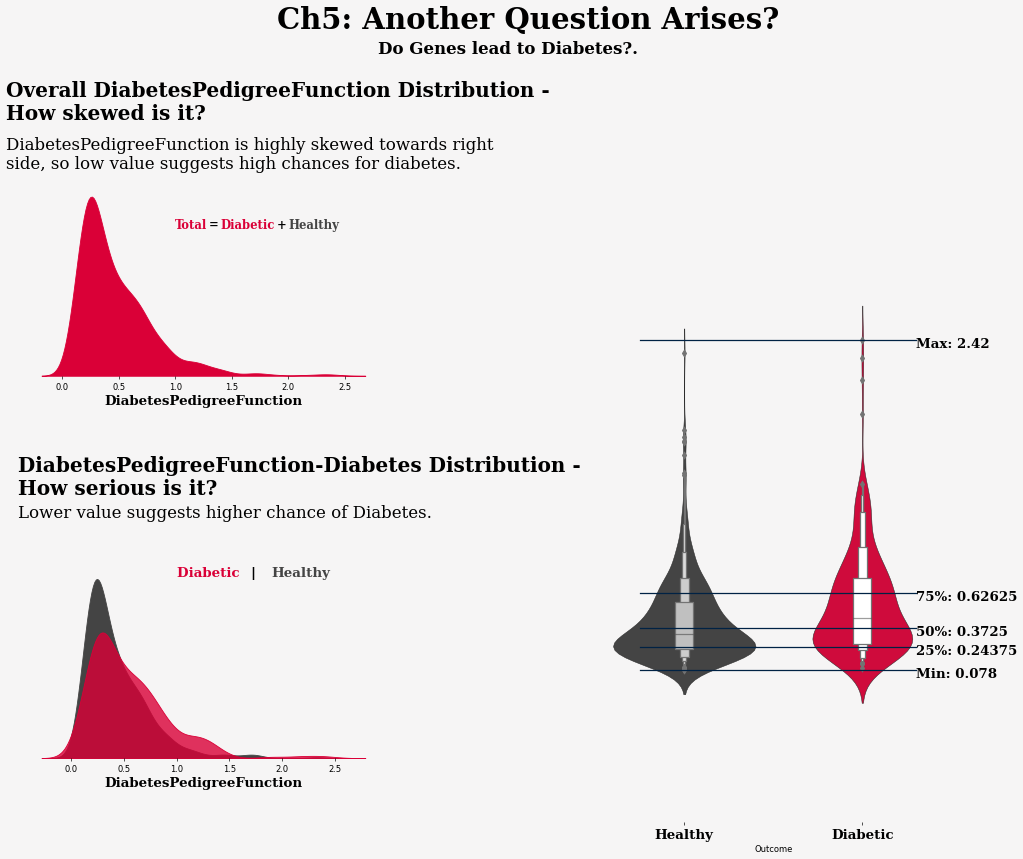

In [17]:
fig = plt.figure(figsize = (24,14),dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[0:3,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot
ax1 = fig.add_subplot(gs[:,12:20]) #dumbbell plot

# axes list
axes = [ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(True)
ax1.axes.get_yaxis().set_visible(False)
ax1.set_xlim(xmin = -250,xmax = 2000)
ax1.set_ylim(ymin = -1,ymax =3.5)

# dumbbell plot

diabetic_insulin = df[df['Outcome'] == 1].insulin_cat.value_counts()
healthy_insulin = df[df['Outcome'] == 0].insulin_cat.value_counts()

sns.violinplot(x=df['Outcome'],y = df['DiabetesPedigreeFunction'], ax = ax1,inner = None, saturation = 0.9,palette =sns.color_palette( palette = [colors[1],colors[3]]) , linewidth = 0.6, **{'linecolor' :'white' })
sns.boxenplot(x=df['Outcome'],y = df['DiabetesPedigreeFunction'], ax = ax1, saturation = 0.9,palette =['#C0C0C0','WHITE'],width=0.1)

v_df = df['DiabetesPedigreeFunction'].describe().drop(index = ['count', 'mean','std'], axis = 0)
 
for idx,value in v_df.items():
    ax1.plot([-0.25,1.3], [value,value], **{'color':colors[4] }, alpha = 1 )
    if idx == 'min':
        idx = 'Min'
    elif idx == 'max':
        idx = 'Max'
    else:
        idx = idx
    ax1.text(1.3,value-0.05,'{}: {}'.format(idx,value) ,{'font':'serif', 'size':16, 'weight':'bold', 'color':'black'})
    ax1.set_xticklabels( labels = ['Healthy','Diabetic'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})


sns.kdeplot(data = df, x = 'DiabetesPedigreeFunction', ax = ax2, shade = True, color = colors[3], alpha = 1, )
ax2.set_xlabel('DiabetesPedigreeFunction', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-0.5,2.6,'Overall DiabetesPedigreeFunction Distribution - \nHow skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24})
ax2.text(-0.5,2.1, 'DiabetesPedigreeFunction is highly skewed towards right \nside, so low value suggests high chances for diabetes.', 
        {'font':'Serif', 'size':20,'color': 'black'})
ax2.text(1,1.5, 'Total',{'font':'Serif', 'size':'14','color': colors[3],'weight':'bold'})
ax2.text(1.3,1.5, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(1.4,1.5, 'Diabetic',{'font':'Serif', 'size':'14','color': colors[3],'weight':'bold'})
ax2.text(1.9,1.5, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(2,1.5, 'Healthy',{'font':'Serif', 'size':'14','color': colors[1],'weight':'bold'})


# distribution plots with hue of Diabetes


sns.kdeplot(data = df[df['Outcome'] == 0], x = 'DiabetesPedigreeFunction',ax = ax3, shade = True,  alpha = 1, color = colors[1] )
sns.kdeplot(data = df[df['Outcome'] == 1], x = 'DiabetesPedigreeFunction',ax = ax3, shade = True,  alpha = 0.8, color = colors[3])

ax3.set_xlabel('DiabetesPedigreeFunction', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-0.5,2.9,'DiabetesPedigreeFunction-Diabetes Distribution - \nHow serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})
ax3.text(-0.5,2.65,'Lower value suggests higher chance of Diabetes.', {'font':'Serif', 'color': 'black', 'size':20})
ax3.text(1,2, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
ax3.text(1.7,2, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(1.9,2, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[1]})

fig.text(0.3,1.07,'Ch5: Another Question Arises?',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.text(0.37,1.04,'Do Genes lead to Diabetes?.',{'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.show()

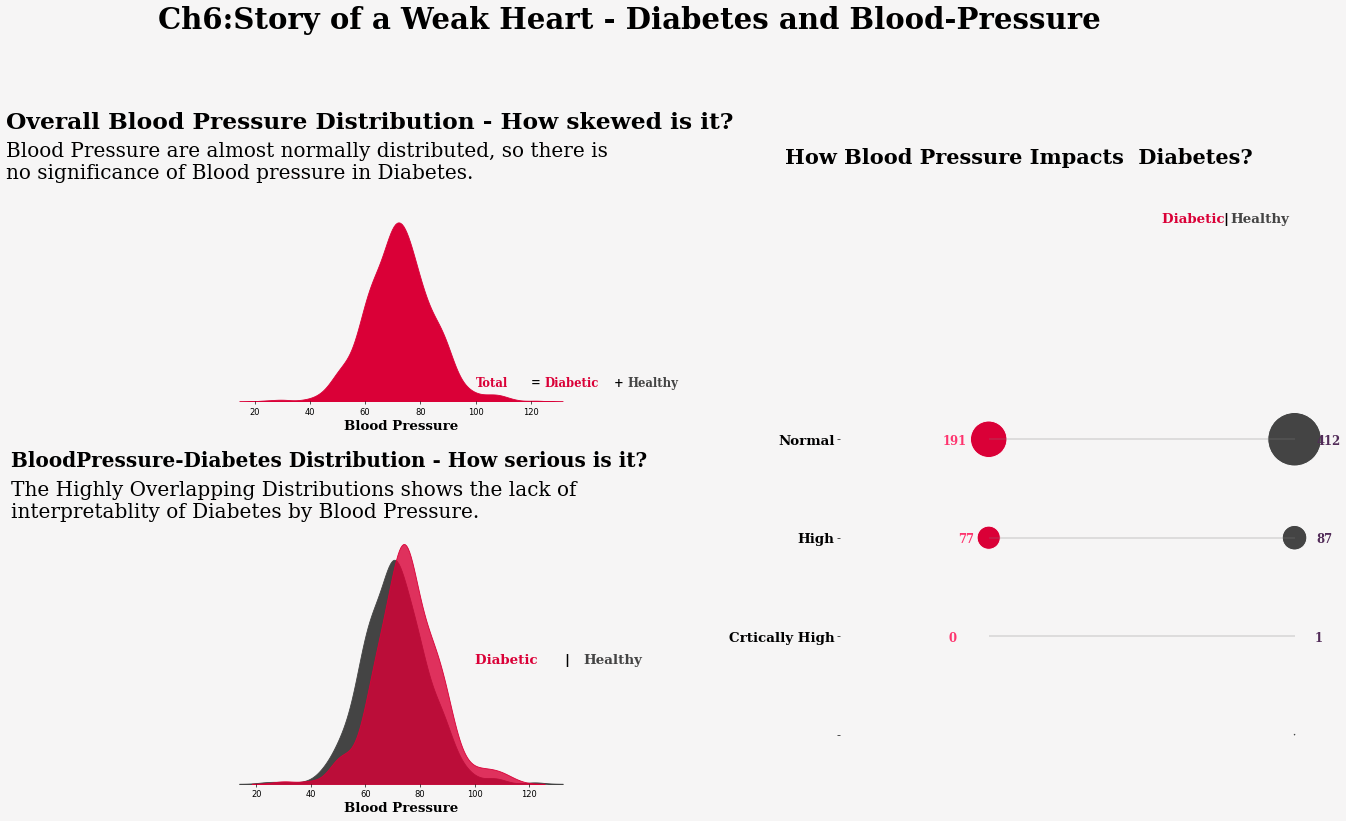

In [18]:
fig = plt.figure(figsize = (24,14),dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[0:3,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[5:9, 0:8]) #hue distribution plot
ax1 = fig.add_subplot(gs[2:9,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_xlim(xmin = -250,xmax = 2000)
ax1.set_ylim(ymin = -1,ymax =3.5)

# dumbbell plot 

diabetic_bp = df[df['Outcome'] == 1].bp_cat.value_counts()
healthy_bp = df[df['Outcome'] == 0].bp_cat.value_counts()

ax1.hlines(y = ['Normal', 'High','Crtically High'], xmin = 420, 
          xmax = 1800, color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = diabetic_bp.index, x = 420, s = diabetic_bp.values*10, color = colors[3], ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_bp.index, x = 1800, s = healthy_bp.values*10, color = colors[1], ax= ax1, alpha = 1)

ax1.set_yticklabels( labels = ['Normal', 'High','Crtically High'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-500,-2.8, 'How Blood Pressure Impacts  Diabetes?' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'})
ax1.text(1200,-2.2, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
ax1.text(1480,-2.2, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1510,-2.2, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[1]})



ax1.text(210,0.05, diabetic_bp['Normal'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1900,0.05, healthy_bp['Normal'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(280,1.05, diabetic_bp['High'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1900,1.05, healthy_bp['High'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(240,2.05, diabetic_bp['Critically High'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(1890,2.05, healthy_bp['Critically High'], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#512b58'})



# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'BloodPressure', ax = ax2, shade = True, color = colors[3], alpha = 1, )
ax2.set_xlabel('Blood Pressure', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-70,0.055,'Overall Blood Pressure Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':28})
ax2.text(-70,0.045, 'Blood Pressure are almost normally distributed, so there is \nno significance of Blood pressure in Diabetes.', 
        {'font':'Serif', 'size':24,'color': 'black'})
ax2.text(100,0.003, 'Total',{'font':'Serif', 'size':'14','color': colors[3],'weight':'bold'})
ax2.text(120,0.003, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(125,0.003, 'Diabetic',{'font':'Serif', 'size':'14','color': colors[3],'weight':'bold'})
ax2.text(150,0.003, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(155,0.003, 'Healthy',{'font':'Serif', 'size':'14','color': colors[1],'weight':'bold'})


# distribution plots with hue of Diabetes


sns.kdeplot(data = df[df['Outcome'] == 0], x = 'BloodPressure',ax = ax3, shade = True,  alpha = 1, color = colors[1] )
sns.kdeplot(data = df[df['Outcome'] == 1], x = 'BloodPressure',ax = ax3, shade = True,  alpha = 0.8, color = colors[3])

ax3.set_xlabel('Blood Pressure', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-70,0.05,'BloodPressure-Diabetes Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})
ax3.text(-70,0.042,'The Highly Overlapping Distributions shows the lack of\ninterpretablity of Diabetes by Blood Pressure.', {'font':'Serif', 'color': 'black', 'size':24})
ax3.text(100,0.019, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
ax3.text(133,0.019, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(140,0.019, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[1]})

fig.text(0.08,1.1,'Ch6:Story of a Weak Heart - Diabetes and Blood-Pressure',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()

<h3 style = "font-size:30px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">3.2.2 Univariate Analysis of Categorical Data
</h3>

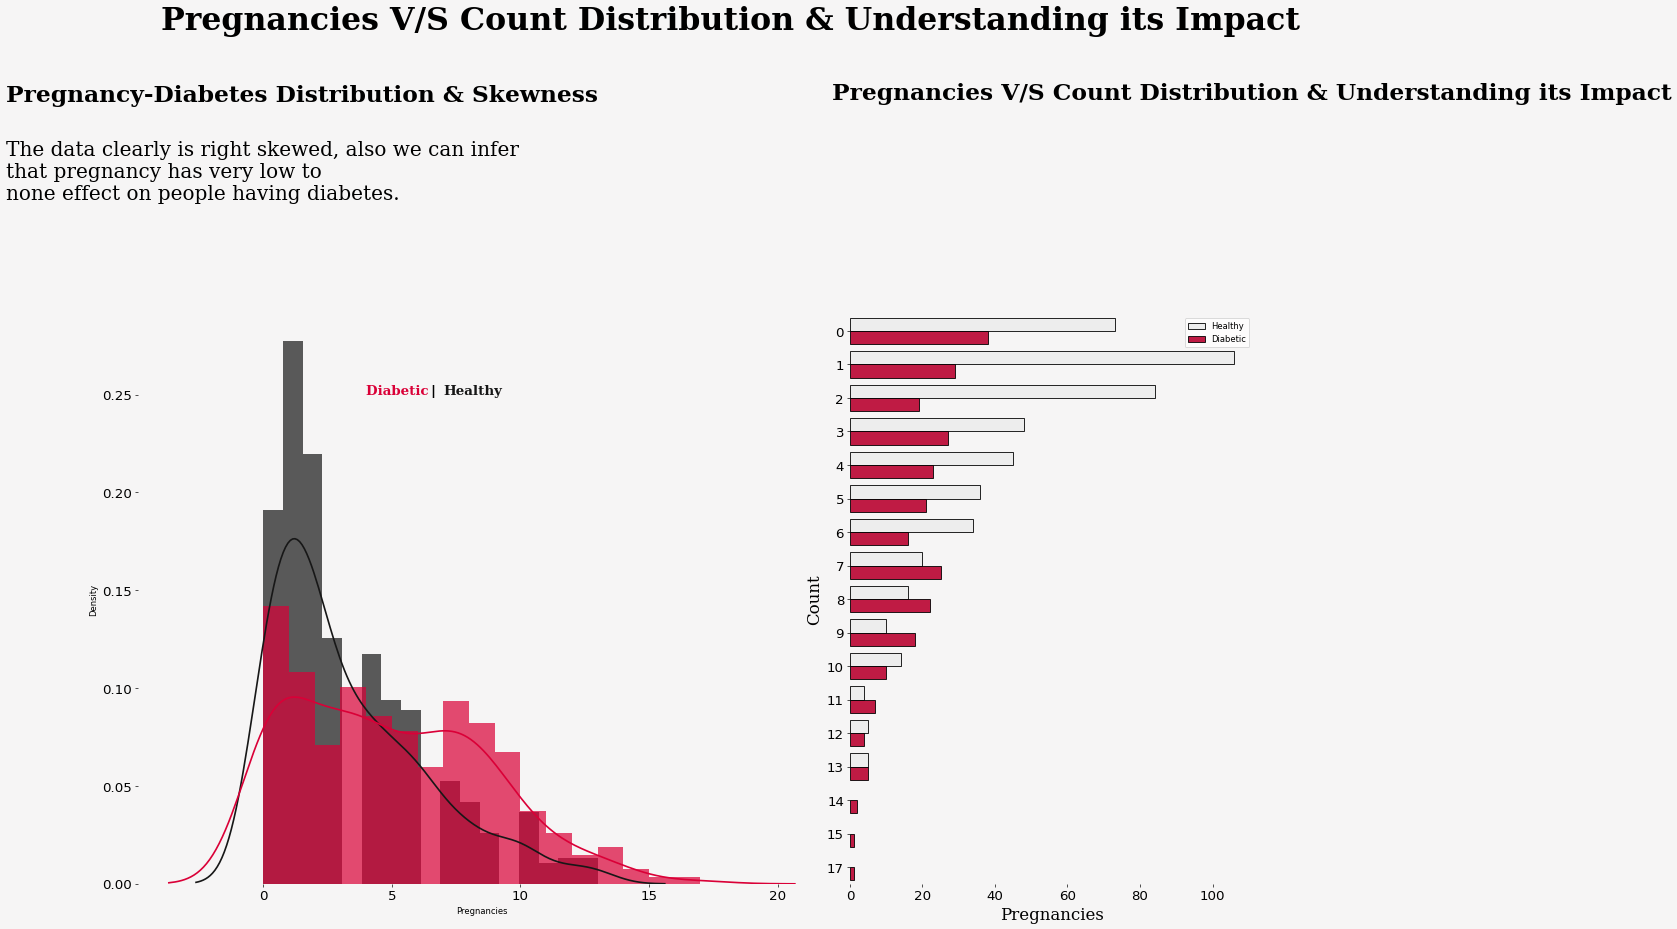

In [19]:
fig = plt.figure(figsize = (24,18),dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[2:9,:15]) #distribution plot
ax1 = fig.add_subplot(gs[2:9,15:]) #dumbbell plot

# axes list
axes = [ ax1,ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax2.axes.get_xaxis().set_visible(True)
ax2.axes.get_yaxis().set_visible(True)
ax2.tick_params(labelsize=16)
ax1.tick_params(labelsize=16)
plt.ylabel('Count',fontdict={'font':'Serif', 'color': 'black','size':20})
plt.xlabel('Pregnancies',fontdict={'font':'Serif', 'color': 'black','size':20})
ax2.text(-10,0.4,'Pregnancy-Diabetes Distribution & Skewness', {'font':'Serif', 'color': 'black','weight':'bold','size':28})
ax2.text(-10,0.35,'The data clearly is right skewed, also we can infer\nthat pregnancy has very low to\nnone effect on people having diabetes. ',{'font':'Serif', 'color': 'black','size':24})
ax2.text(4,0.25, 'Diabetic ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':colors[3]})
ax2.text(6.5,0.25, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax2.text(7,0.25, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':colors[0]})

sns.distplot(df.loc[df['Outcome'] == 0, "Pregnancies"],bins=17, color=colors[0], label="Healthy", hist_kws={'alpha':.7}, kde_kws={'linewidth':2},ax=ax2)
sns.distplot(df.loc[df['Outcome'] == 1, "Pregnancies"],bins=17, color=colors[3], label="Diabetic", hist_kws={'alpha':.7}, kde_kws={'linewidth':2},ax=ax2)
plt.ylim(0, 1)



sns.countplot(y='Pregnancies',hue='Outcome',data=df,palette=sns.color_palette( palette = [colors[2],colors[3]]),linewidth=1,edgecolor=sns.color_palette(palette=['black']),ax=ax1)
plt.legend({'Healthy':0,'Diabetic':1})
ax1.text(-5,-6.9,'Pregnancies V/S Count Distribution & Understanding its Impact', {'font':'Serif', 'color': 'black','weight':'bold','size':28})
ax1.text(-190,-9,'Pregnancies V/S Count Distribution & Understanding its Impact', {'font':'Serif', 'color': 'black','weight':'bold','size':38})
ax1.axes.get_xaxis().set_visible(True)
ax1.axes.get_yaxis().set_visible(True)
sns.set_context("paper", font_scale=2)
plt.ylabel('Count',fontdict={'font':'Serif', 'color': 'black','size':20})
plt.xlabel('Pregnancies',fontdict={'font':'Serif', 'color': 'black','size':20})
fig.show()

In [20]:
def heatmaps(cat1,cat2,order1,order2):

    fig = plt.figure(figsize=(12,6), dpi = 100)
    gs = fig.add_gridspec(1,2)
    gs.update(wspace=0.25, hspace=0.5)

    ax0 = fig.add_subplot(gs[0,0])
    ax1 = fig.add_subplot(gs[0,1])

    fig.patch.set_facecolor('#f6f5f5')
    ax0.set_facecolor('#f6f5f5')
    ax1.set_facecolor('#f6f5f5')

    healthy = df[df['Outcome']==0]
    diabetic = df[df['Outcome']==1]


    col1 = [colors[2], colors[3]]
    colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
    col2 = [colors[1],colors[3]]
    colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

    diabetic = pd.crosstab(diabetic[cat1],[diabetic[cat2]],normalize='index').loc[order1,order2]
    healthy = pd.crosstab(healthy[cat1],[healthy[cat2]], normalize='index').loc[order1,order2]

    sns.heatmap(ax=ax0, data=diabetic, linewidths= 0,
                square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

    sns.heatmap(ax=ax1, data=healthy, linewidths=0, 
                square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)




    ax0.axes.set_xticklabels(order2, {'font':'serif', 'color':'black', 'size':12})
    ax1.axes.set_xticklabels(order2, {'font':'serif', 'color':'black', 'size':12})

    ax0.axes.set_yticklabels(order1, {'font':'serif', 'color':'black', 'size':16}, rotation = 0)
    ax0.set_xlabel('')
    ax0.set_ylabel('')
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax1.axes.get_yaxis().set_visible(False)
    return ax0,ax1

<h3 style = "font-size:30px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">3.2.3 Blood Pressure  V/S All
</h3>
<p> 
    <strong style="font-size:17px">**As we saw above, univariate analysis for Blood Pressure did not give positive results, this is to check for any synergy effect in the Dataset.**</strong>
</p>

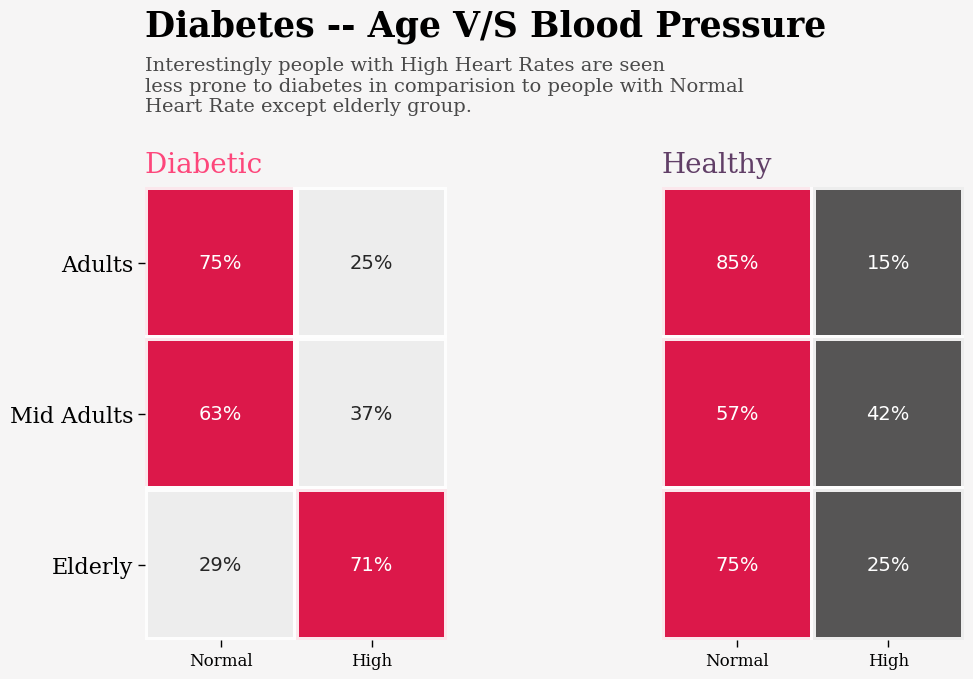

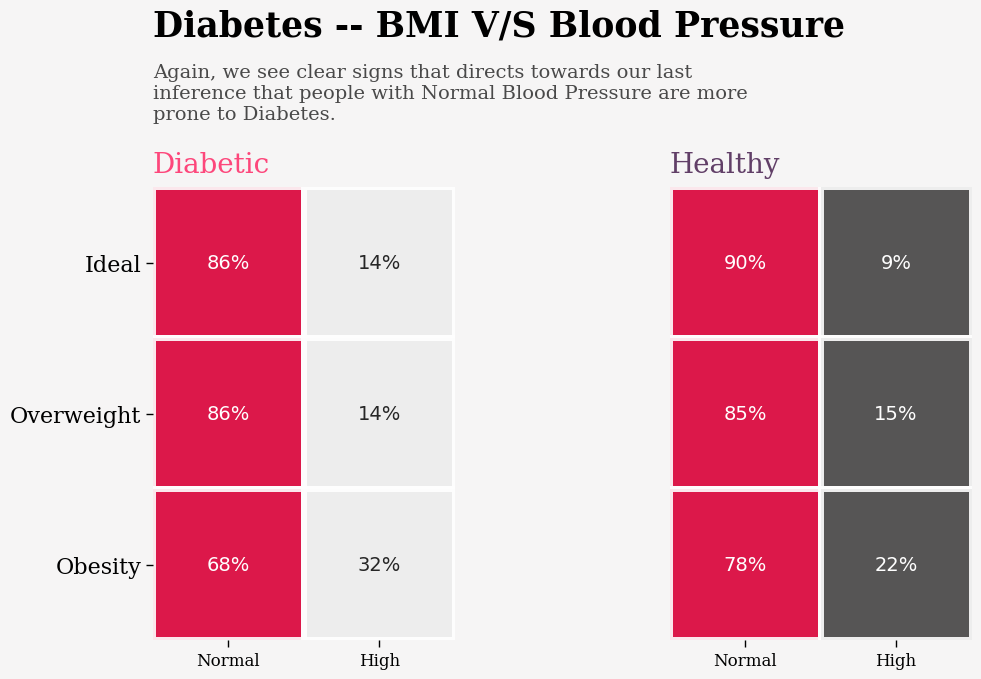

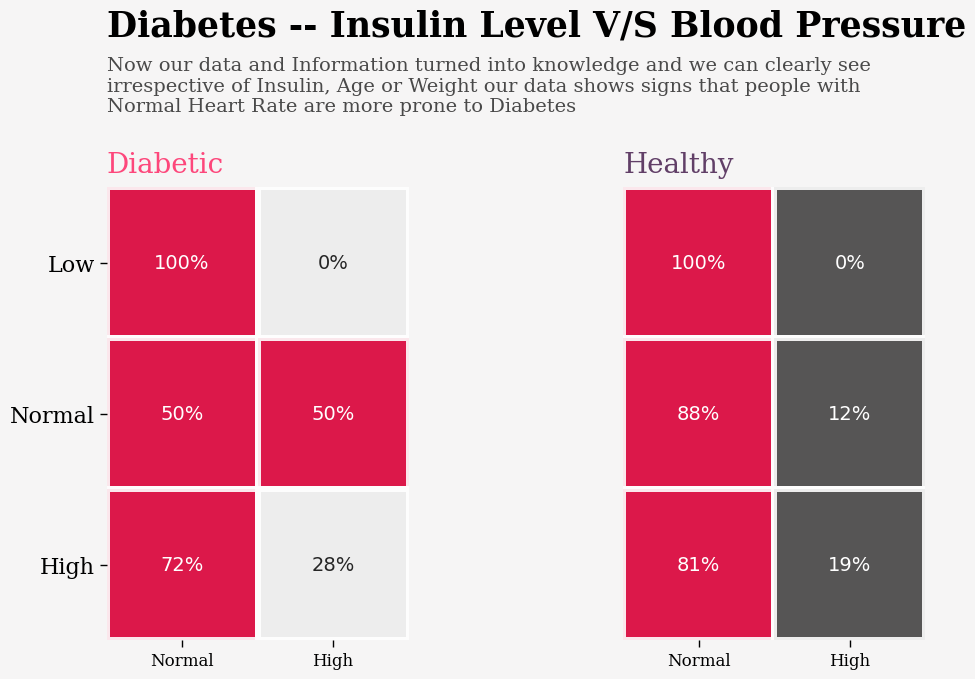

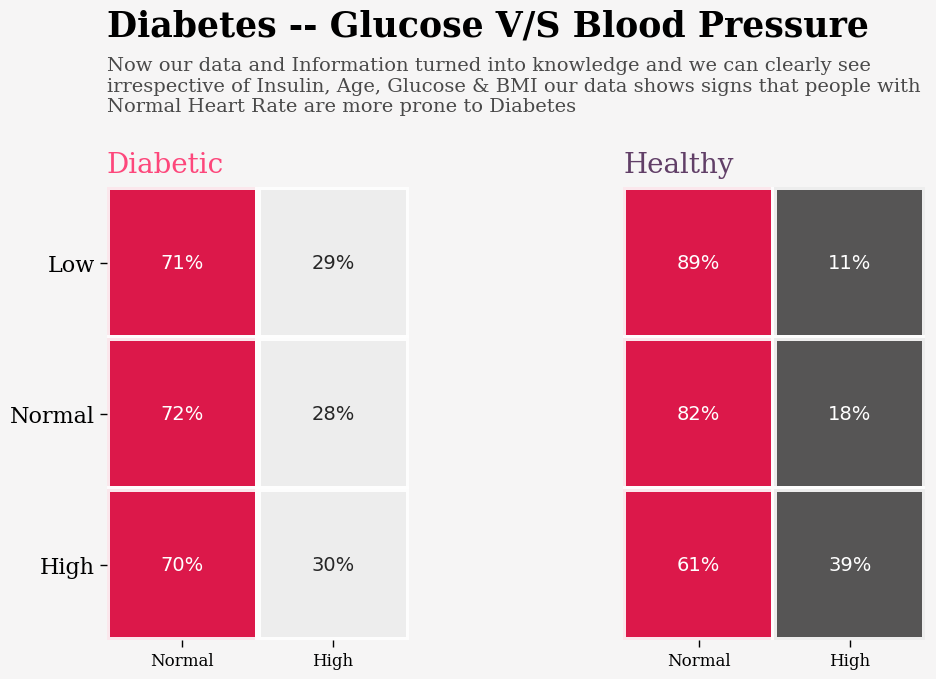

In [21]:
ax0,ax1 = heatmaps('age_cat','bp_cat',['Adults','Mid Adults','Elderly'],['Normal', 'High'])
ax0.text(0, -1., 'Diabetes -- Age V/S Blood Pressure', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.5, 'Interestingly people with High Heart Rates are seen \nless prone to diabetes in comparision to people with Normal \nHeart Rate except elderly group.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Diabetic ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'Healthy', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)


ax0,ax1 = heatmaps('bmi_cat','bp_cat',['Ideal', 'Overweight', 'Obesity'],['Normal', 'High'])
ax0.text(0, -1., 'Diabetes -- BMI V/S Blood Pressure', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.45, 'Again, we see clear signs that directs towards our last \ninference that people with Normal Blood Pressure are more\nprone to Diabetes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Diabetic', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'Healthy', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)


ax0,ax1 = heatmaps('insulin_cat','bp_cat',['Low','Normal', 'High'],['Normal', 'High'])
ax0.text(0, -1., 'Diabetes -- Insulin Level V/S Blood Pressure', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.5, 'Now our data and Information turned into knowledge and we can clearly see \nirrespective of Insulin, Age or Weight our data shows signs that people with \nNormal Heart Rate are more prone to Diabetes', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Diabetic', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'Healthy', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)


ax0,ax1 = heatmaps('glucose_cat','bp_cat',['Low','Normal', 'High'],['Normal', 'High'])
ax0.text(0, -1., 'Diabetes -- Glucose V/S Blood Pressure', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.5, 'Now our data and Information turned into knowledge and we can clearly see \nirrespective of Insulin, Age, Glucose & BMI our data shows signs that people with \nNormal Heart Rate are more prone to Diabetes', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Diabetic', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'Healthy', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)
fig.show()

<h3 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 30px;">3.2.4 Correlations
</h3>

The visualization did not lead us to a good conclusion. Also,<br>
that the Visualization is over let's drop the features we created

In [22]:
df.drop(['age_cat','bmi_cat','glucose_cat','insulin_cat','bp_cat'],axis=1,inplace=True)

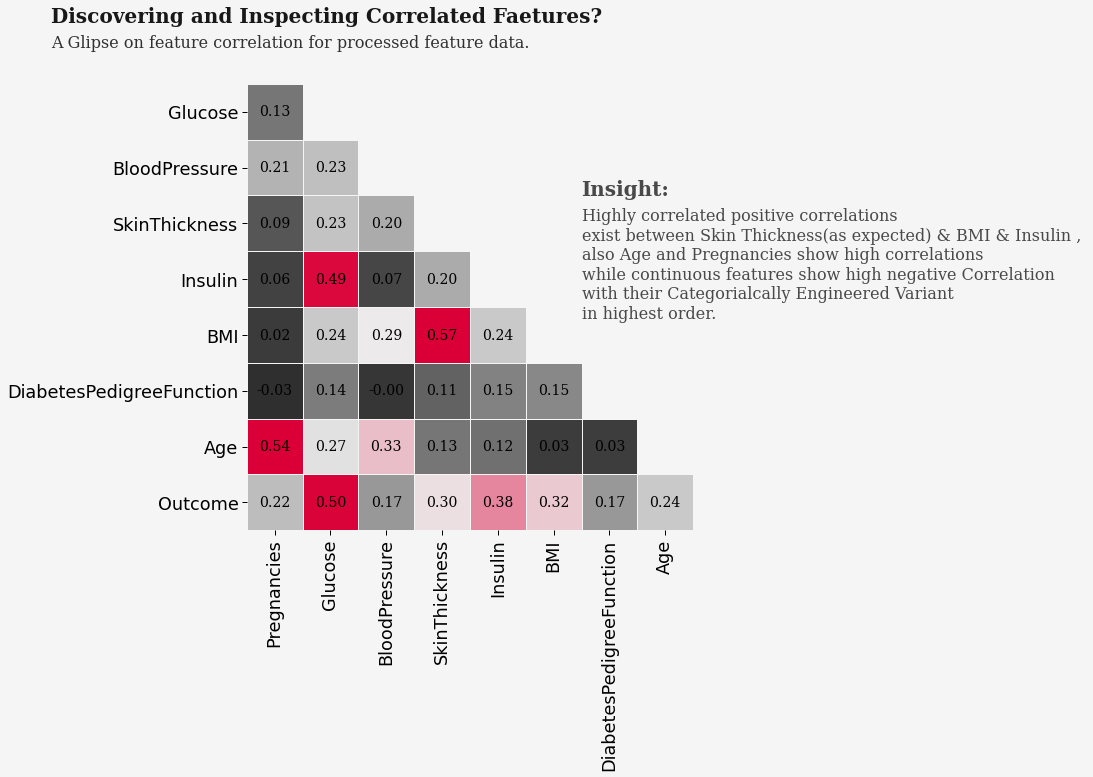

In [23]:
# preprocessing - label enconding and numerical value scaling
mm = MinMaxScaler()

df_copy = df.copy()

cols = df.columns[:-1]
## normalizing with standard scaler of numerical features
df[cols] = mm.fit_transform(df[cols])


# correlation map for all the features
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize = (8,12))
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()


colorss = colors[:4]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colorss)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",cmap = colormap,
           vmin=-0.15, vmax=0.5, cbar_kws={"shrink": .5, }, ax = ax, cbar = False,
           linewidth = 1,linecolor = '#f6f5f5', square = True,annot_kws = {'font':'serif', 'size':14, 'color':'black'} )
# yticks
ax.tick_params(axis = 'y', rotation=0)
ax.text(-3.5,-1.1, 'Discovering and Inspecting Correlated Faetures?',{'font':'serif', 'size': 20, 'weight':'bold'}, alpha = 0.9)
ax.text(-3.5,-0.65, 'A Glipse on feature correlation for processed feature data.',{'font':'serif', 'size': 16, 'weight':'normal'}, alpha = 0.8)

ax.text(6,4.2, 'Highly correlated positive correlations \nexist between Skin Thickness(as expected) & BMI & Insulin , \nalso Age and Pregnancies show high correlations\nwhile continuous features show high negative Correlation\nwith their Categorialcally Engineered Variant\nin highest order.',{'font':'serif', 'size': 16, 'weight':'normal'},alpha = 0.7)
ax.text(6,2, 'Insight:',{'font':'serif', 'size': 20, 'weight':'bold'},alpha = 0.7)

fig.show()

<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">4. Feature Selection
</h1>

<h3 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">4.1 Solving the Problem of Skewness.
</h3>


### Applying log-transform:

As we saw earlier during Univariate Analysis, most of the features are very skewed, we can deal with those features using Log-Transform.
<hr style="border-top: 10px dotted red; background-color:white;margin-right:1000px">
When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data. The important caveat here is that the original data has to follow or approximately follow a log-normal distribution. Otherwise, the log transformation won’t work.

In [24]:
df[cols] = df[cols].replace(0,1e-5)

In [25]:
X = df.drop(['Outcome'],axis=1)
feat = df.drop(['Outcome'],axis=1).columns
y = df['Outcome']
#---------------------------------------------------------------------------
#---------------------------------------------------------------------------
df['Insulin'] = X['Insulin'].apply(lambda x: np.log(x))
df['Glucose'] = X['Glucose'].apply(lambda x: np.log(x))
df['BMI'] = X['BMI'].apply(lambda x: np.log(x))
df['SkinThickness'] = X['SkinThickness'].apply(lambda x: np.log(x))
df['BloodPressure'] = X['BloodPressure'].apply(lambda x: np.log(x))
df['Age'] = X['Age'].apply(lambda x: np.log(x))
df['DiabetesPedigreeFunction'] = X['DiabetesPedigreeFunction'].apply(lambda x: np.log(x))

In [26]:
def plot_ready(x,pos):
    fig = plt.figure(figsize = (24,8),dpi = 60)

    gs = fig.add_gridspec(10,24)
    gs.update(wspace = 1, hspace = 0.05)


    ax2 = fig.add_subplot(gs[2:9,:12]) 
    ax1 = fig.add_subplot(gs[2:9,12:]) 
    # axes list
    axes = [ ax1,ax2]

    # setting of axes; visibility of axes and spines turn off
    for ax in axes:
        ax.set_facecolor('#f6f5f5')

        for loc in ['left', 'right', 'top', 'bottom']:
            ax.spines[loc].set_visible(False)

    fig.patch.set_facecolor('#f6f5f5')

    ax2.axes.get_xaxis().set_visible(True)
    ax2.axes.get_yaxis().set_visible(True)
    ax2.tick_params(labelsize=16)
    ax1.tick_params(labelsize=16)
    sns.violinplot(df[x], ax =ax1,cut =0, 
                   color = colors[3],inner = None,
                   alpha = 0.6,linewidth = 3,edgecolor = 'solidblack', saturation =0.75 )
    sns.boxenplot(x= df[x], ax = ax1, saturation = 0.9,palette =[colors[4]],width=0.05)
    sns.violinplot(X[x], ax =ax2,cut =0, 
                   color = colors[1],inner = None,
                   alpha = 0.6,linewidth = 3,edgecolor = 'solidblack', saturation =0.75 )
    sns.boxenplot(x = X[x], ax = ax2, saturation = 0.9,palette =[colors[4]],width=0.05)
    plt.xlabel('Updated '+x)
    fig.text(pos,0.75,f'{x} V/S log({x})',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
    return fig

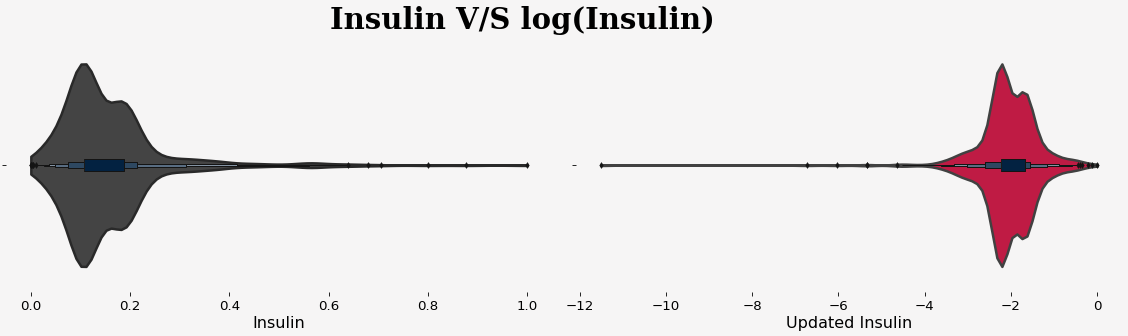

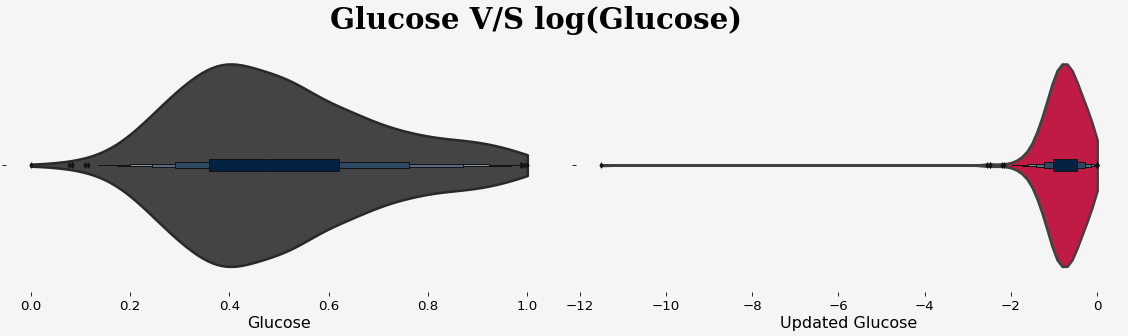

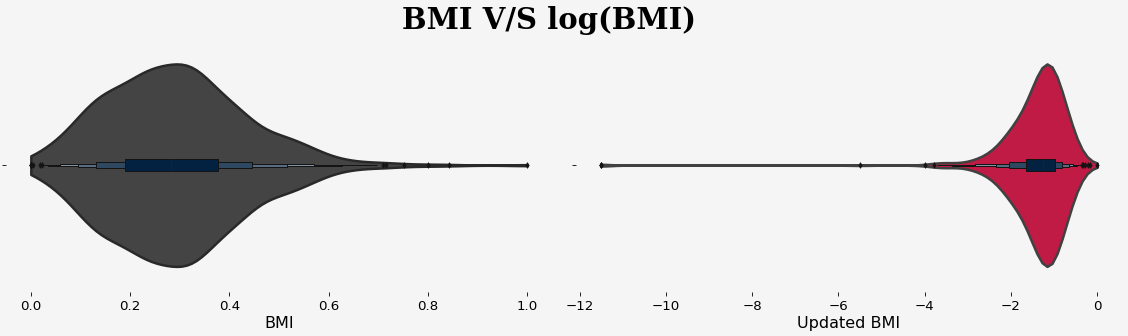

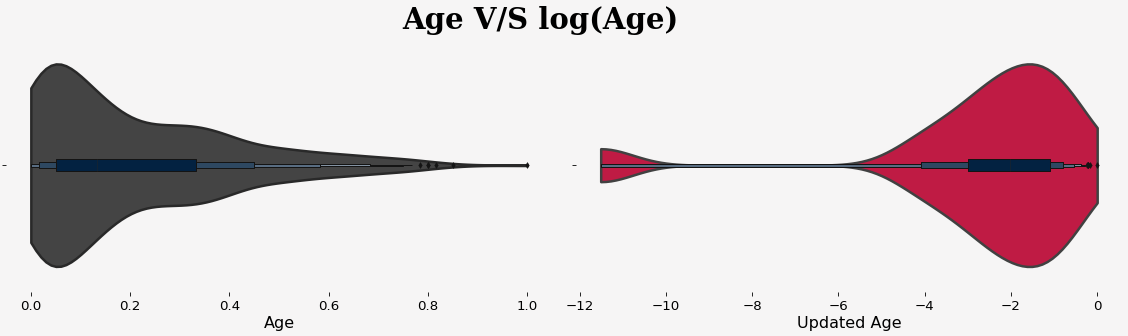

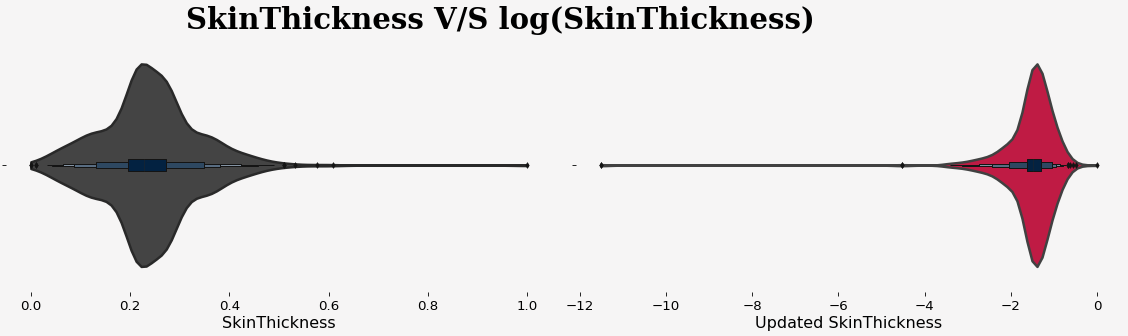

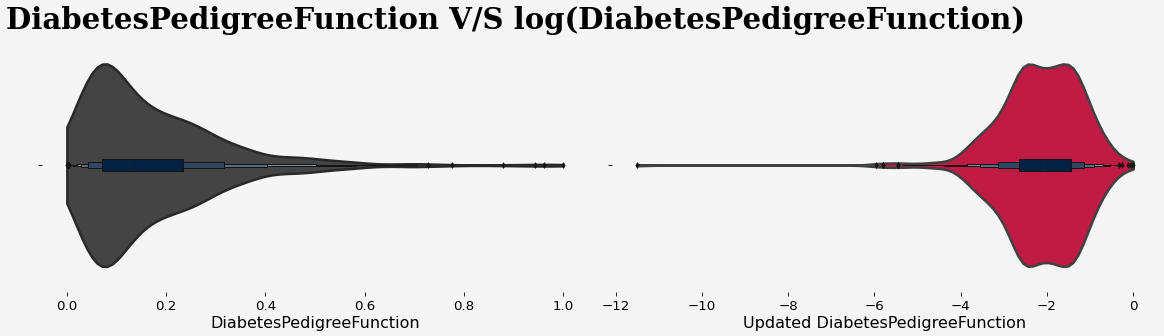

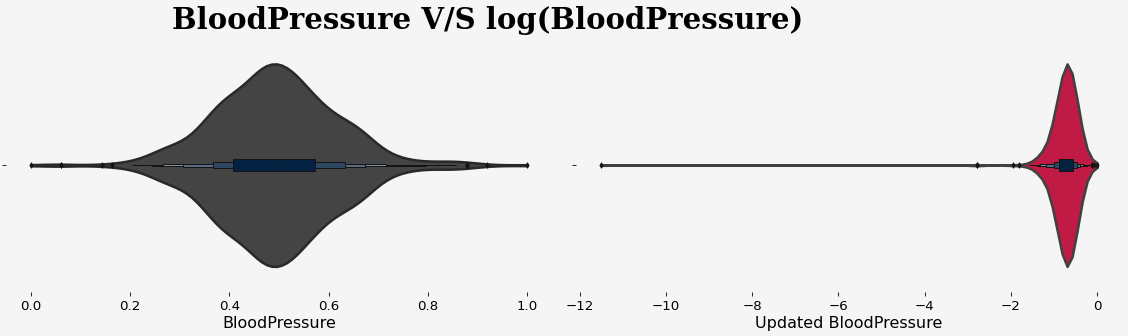

In [27]:
features = ['Insulin','Glucose','BMI','Age','SkinThickness','DiabetesPedigreeFunction','BloodPressure']
pos = [0.35,0.35,0.4,0.4,0.25,0.1,0.24]
for x,z in zip(features,pos):
    fig = plot_ready(x,z)

**The results above show the decrease in  skewness**

<h3 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">4.2 Data Scaling
</h3>


**Helper Function for Classification**

In [28]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, shuffle = True, random_state = 42)
def make_classification(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, shuffle = True, random_state = 42)
    accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[]

    random_state = 2

    ##classifiers 
    classifiers = []
    classifiers.append(SVC(random_state=random_state, probability = True))
    classifiers.append(DecisionTreeClassifier(random_state=random_state))
    classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
    classifiers.append(RandomForestClassifier(random_state=random_state))
    classifiers.append(GradientBoostingClassifier(random_state=random_state))
    classifiers.append(KNeighborsClassifier())
    classifiers.append(LogisticRegression(random_state = random_state))
    classifiers.append(XGBClassifier(random_state = random_state))
    classifiers.append(LGBMClassifier(random_state = random_state))
    classifiers.append(LinearDiscriminantAnalysis())
    classifiers.append(QuadraticDiscriminantAnalysis())
    classifiers.append(ExtraTreesClassifier())

    for classifier in classifiers:

        #classifier and fitting
        clf = classifier
        clf.fit(X_train,y_train)

        #predictions
        y_preds = clf.predict(X_test)
        y_probs = clf.predict_proba(X_test)

        # metrics
        accuracy.append((round(accuracy_score(y_test,y_preds),2))*100)
        precision.append((round(precision_score(y_test,y_preds),2))*100)
        recall.append((round(recall_score(y_test,y_preds),2))*100)
        f1.append((round(f1_score(y_test,y_preds),2))*100)
        auc.append((round (roc_auc_score(y_test,y_probs[:,1]), 2))*100)
        conf_mat.append(confusion_matrix(y_test,y_preds))

    results_df = pd.DataFrame({"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Confusion Matrix":conf_mat,
                        "Algos":["SVC","DecisionTree","AdaBoost",
                                     "RandomForest","GradientBoosting",
                                     "KNeighboors","LogisticRegression",
                                     "XGBoost", "LightGBM","LDA","QDA","ExtraTrees"]})

    results = (results_df.sort_values(by = ['AUC Score','f1 Score'], ascending = False)
                  .reset_index(drop =  True))
    return classifiers,results
classifiers,results = make_classification(X,y)

[10:06:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
results

,Accuracy Score,Precision Score,Recall Score,f1 Score,AUC Score,Confusion Matrix,Algos
0,88.0,82.0,82.0,82.0,94.0,"[[187, 19], [18, 84]]",GradientBoosting
1,88.0,81.0,83.0,82.0,94.0,"[[186, 20], [17, 85]]",XGBoost
2,88.0,82.0,80.0,81.0,94.0,"[[188, 18], [20, 82]]",LightGBM
3,87.0,80.0,82.0,81.0,93.0,"[[185, 21], [18, 84]]",RandomForest
4,87.0,80.0,80.0,80.0,92.0,"[[185, 21], [20, 82]]",ExtraTrees
5,85.0,76.0,79.0,78.0,86.0,"[[180, 26], [21, 81]]",SVC
6,81.0,71.0,75.0,73.0,86.0,"[[175, 31], [26, 76]]",LDA
7,82.0,74.0,71.0,72.0,86.0,"[[181, 25], [30, 72]]",KNeighboors
8,81.0,70.0,75.0,72.0,86.0,"[[174, 32], [26, 76]]",LogisticRegression
9,86.0,79.0,80.0,80.0,85.0,"[[184, 22], [20, 82]]",AdaBoost


**As we can see our models barely pass the Null Score i.e. 65%, so there might be some unwanted features we want to deal with.**

<h3 style = "font-size:40px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">4.3 Feature Selection
</h3>


<h3 style = "font-size:30px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">4.3.1 Feature Importance by weights:
</h3>
<p style='font-size:20px; text-align:justify'>
    Every Feature in our dataset on contributes to the learning, but not every feature has same weightage when it comes to making predictions, additionally hand picking our data would save some time in training too and also reduces the redundancy.Here we will discover how we can estimate the importance of features for a predictive modeling problem using the XGBoost library in Python. A benefit of using gradient boosting is that after the boosted trees are constructed, it is relatively straightforward to retrieve importance scores for each attribute.<br>
<span style="color:teal">** The testing will be done using Random Forest because so for best accuracy and AUC was given by random forest</span>

</p>

In [30]:
X_train = X_train.copy()
clf = XGBClassifier()
clf.fit(X_train,y_train)
key,value = clf.get_booster().get_score(importance_type='weight').keys(),clf.get_booster().get_score(importance_type='weight').values()
imp = pd.DataFrame(index=key)
imp['Feature Importance'] = value
imp.sort_values(by='Feature Importance',ascending=False)

[10:06:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Feature Importance
Insulin,179
Glucose,135
DiabetesPedigreeFunction,101
Age,97
SkinThickness,69
BMI,69
Pregnancies,62
BloodPressure,59


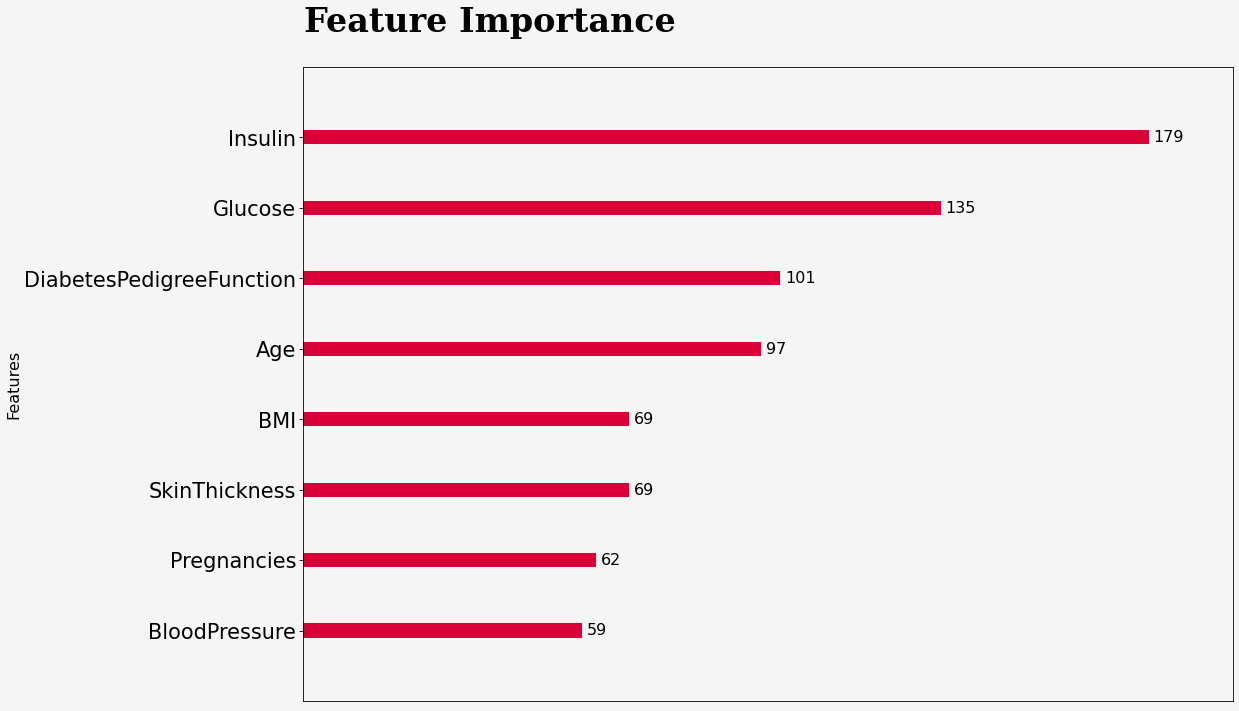

In [31]:
from xgboost import plot_importance

fig = plt.figure(figsize = (20,14),dpi = 60)
ax = fig.add_subplot()
ax.text(0.08,8.5,'Feature Importance',{'font': 'serif', 'size':40,'weight':'bold','color':'black'})
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(True)
ax.tick_params(colors = 'black',labelsize=25,grid_color='#f6f5f5')
plot_importance(clf,ax=ax,grid=False,color=[colors[3]],title=None)
fig.show()

**Testing Model For Different Thresholds based on Feature Importances**

In [32]:
from sklearn.feature_selection import SelectFromModel

X_train_rand = X_train.copy()

X_test_rand = X_test.copy()


clf = RandomForestClassifier()
clf.fit(X_train_rand,y_train)
#clf.get_booster().get_score(importance_type='weight')
accuracy_score(y_test,clf.predict(X_test_rand))
thresholds = sorted(clf.feature_importances_)
eval_set = [(X_train_rand, y_train), (X_test_rand, y_test)]
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_rand)
    # train model
    selection_model = RandomForestClassifier(random_state=2)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test_rand)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.044, n=8, Accuracy: 87.34%
Thresh=0.049, n=7, Accuracy: 87.66%
Thresh=0.070, n=6, Accuracy: 88.96%
Thresh=0.091, n=5, Accuracy: 87.66%
Thresh=0.091, n=4, Accuracy: 87.34%
Thresh=0.139, n=3, Accuracy: 86.04%
Thresh=0.155, n=2, Accuracy: 85.06%
Thresh=0.361, n=1, Accuracy: 80.19%


<h3 style = "font-size:30px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">4.3.2 Feature Importance by adding Random Column
</h3>

<p style='font-size:20px; text-align:justify'>
    Now as we know how to Calculate the FEATURE IMPORTANCES, we shall find a thershold for features that actually matters.<br>
    To do so, we will:
    <li style='font-size:16px; text-align:justify'>Add a Random Column</li>
    <li style='font-size:16px; text-align:justify'>Calculate Feature Importances</li>
    <li style='font-size:16px; text-align:justify'>All the Columns below Random Column do not show enough evidence to be useful</li>
<span style="color:teal">** The testing will be done using Random Forest because so for best accuracy and AUC was given by random forest</span>

</p>

In [33]:
np.random.RandomState(42)
X_train_rand = X_train.copy()
X_train_rand['Random'] = np.random.normal(size=len(X_train_rand))
clf = XGBClassifier(random=42)
clf.fit(X_train_rand,y_train)

key,value = clf.get_booster().get_score(importance_type='weight').keys(),clf.get_booster().get_score(importance_type='weight').values()
imp = pd.DataFrame(index=key)
imp['Feature Importance'] = value
imp = imp.sort_values(by='Feature Importance',ascending=False)

[10:06:07] WARNING: ../src/learner.cc:573: 
Parameters: { "random" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:06:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


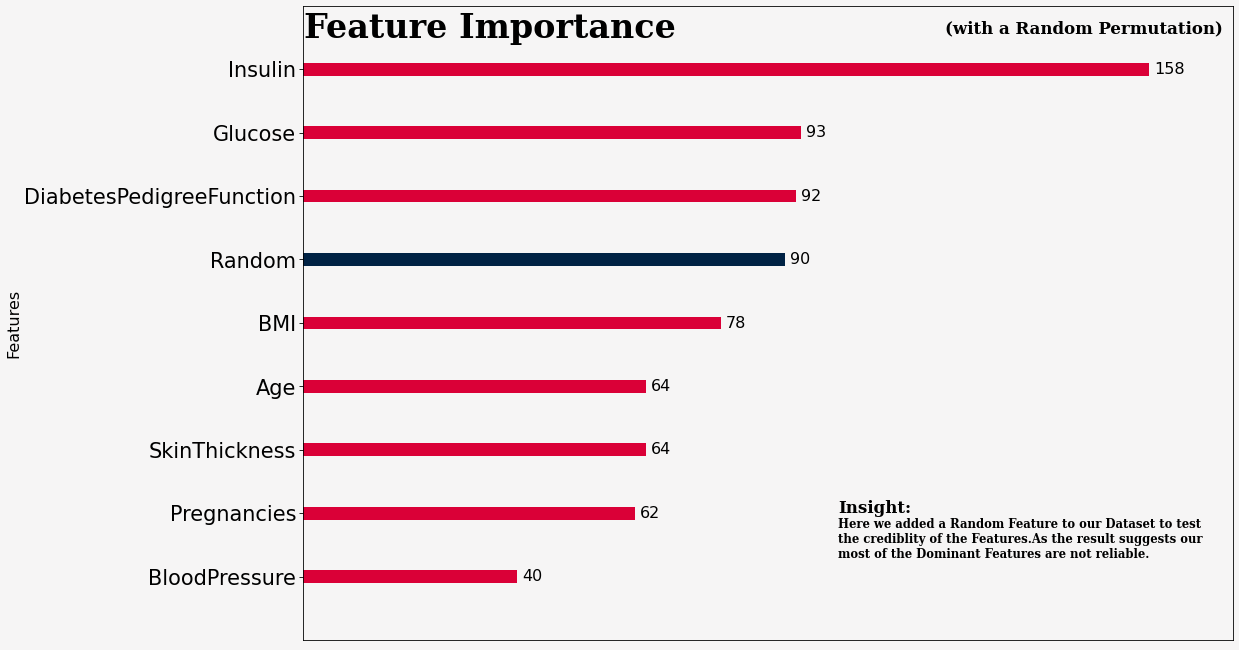

In [34]:
fig = plt.figure(figsize = (20,14),dpi = 60)
ax = fig.add_subplot()

ax.text(0.08,8.5,'Feature Importance',{'font': 'serif', 'size':40,'weight':'bold','color':'black'})
ax.text(120,8.57,'(with a Random Permutation)',{'font': 'serif', 'size':20,'weight':'bold','color':'black'})
ax.text(100,1,'Insight:',{'font': 'serif', 'size':20,'weight':'bold','color':'black'})
ax.text(100,0.3,'Here we added a Random Feature to our Dataset to test\nthe crediblity of the Features.As the result suggests our \nmost of the Dominant Features are not reliable.',{'font': 'serif', 'size':14,'weight':'bold','color':'black'})
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(True)
ax.tick_params(colors = 'black',labelsize=25,grid_color='#f6f5f5')
plot_importance(clf,ax=ax,grid=False,color=[colors[4] if x=='Random' else colors[3] for x in imp.index][::-1],title=None)
fig.show()

In [35]:
from sklearn.feature_selection import SelectFromModel

X_test_rand = X_test.copy()
X_test_rand['Random'] = np.random.random(size=len(X_test_rand))

model_select = RandomForestClassifier()
model_select.fit(X_train_rand,y_train)
#clf.get_booster().get_score(importance_type='weight')
accuracy_score(y_test,model_select.predict(X_test_rand))
thresholds = sorted(model_select.feature_importances_)
max_acc,thresh_max =0,0 
eval_set = [(X_train_rand, y_train), (X_test_rand, y_test)]
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model_select, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_rand)
    
    selection_model = RandomForestClassifier(random_state=2)
    selection_model.fit(select_X_train, y_train)

    select_X_test = selection.transform(X_test_rand)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    if accuracy>max_acc:
        max_acc,thresh_max=accuracy,thresh
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.032, n=9, Accuracy: 88.31%
Thresh=0.043, n=8, Accuracy: 87.01%
Thresh=0.047, n=7, Accuracy: 87.99%
Thresh=0.051, n=6, Accuracy: 88.96%
Thresh=0.059, n=5, Accuracy: 87.66%
Thresh=0.076, n=4, Accuracy: 88.31%
Thresh=0.132, n=3, Accuracy: 86.04%
Thresh=0.162, n=2, Accuracy: 85.06%
Thresh=0.399, n=1, Accuracy: 80.19%


<h3 style = "font-size:30px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">4.3.3 Feature Importance by Permutation
</h3>
<p style='font-size:20px; text-align:justify'>
    Here the One column at a time was shuffled to see the difference in Performance/Impact of the data on the Outcome.
</p>

In [36]:
from sklearn.inspection import permutation_importance

model = XGBClassifier()
model.fit(X_train,y_train)

res = permutation_importance(model, X, y, scoring='accuracy')
imp = res.importances_mean

for i,v in enumerate(imp):
    sp = " "*(25-len(X_train.columns[i]))
    print(f'{X_train.columns[i]} {sp} Score: {v}')

[10:06:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pregnancies                Score: 0.007552083333333281
Glucose                    Score: 0.06406249999999995
BloodPressure              Score: 0.002343749999999978
SkinThickness              Score: 0.00651041666666663
Insulin                    Score: 0.28541666666666665
BMI                        Score: 0.00494791666666663
DiabetesPedigreeFunction   Score: 0.00572916666666663
Age                        Score: 0.03932291666666665


In [37]:
# feature transform
model_select = GradientBoostingClassifier()
model_select.fit(X_train,y_train)
#clf.get_booster().get_score(importance_type='weight')
accuracy_score(y_test,model_select.predict(X_test))
thresholds = sorted(model_select.feature_importances_)
max_acc,thresh_max =0,0 
eval_set = [(X_train, y_train), (X_test, y_test)]
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model_select, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    selection_model = RandomForestClassifier(random_state=2)
    selection_model.fit(select_X_train, y_train)

    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    if accuracy>max_acc:
        max_acc,thresh_max=accuracy,thresh


selection = SelectFromModel(model_select, threshold=thresh_max, prefit=True)
X_selected = selection.transform(X)
classfiers,res_df=make_classification(X_selected,y)

[10:06:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">5. Modelling & Visualization
</h1>

**Helper Function For Visualization**<br>
Model: I will focus on analyzing the algorithms through the lens of three metrics: accuracy, ROC area, and F1 measure.

In [38]:
def multi_visualize(data, vmin = -0.5, vmax = 1):
    fig = plt.figure(figsize =(24,34))
    gs = fig.add_gridspec(8,4)
    gs.update(wspace = 0.2, hspace = 0.2)
    
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[0,2])
    
    ax4 = fig.add_subplot(gs[1,0])
    ax5 = fig.add_subplot(gs[1,1])
    ax6 = fig.add_subplot(gs[1,2])
    
    ax7 = fig.add_subplot(gs[2,0])
    ax8 = fig.add_subplot(gs[2,1])
    ax9 = fig.add_subplot(gs[2,2])
    
    ax10 = fig.add_subplot(gs[3,0])
    ax11 = fig.add_subplot(gs[3,1])
    ax12 = fig.add_subplot(gs[3,2])
    
    
    axes1 = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9,ax10,ax11,ax12]
    
    ax_list = axes1
    
    fig.patch.set_facecolor('#f6f5f5')
    
    # setting of axes; visibility of axes and spines turn off
    for ax in ax_list:
        ax.axes.get_yaxis().set_visible(False)
        ax.axes.get_xaxis().set_visible(False)
        ax.set_facecolor('#f6f5f5')

    colorss = ['#512b58','#fe346e']
    colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colorss)
        
    res_df = data[0]
        
    acc = res_df['Accuracy Score']   
    alg = res_df['Algos']
    cf = res_df['Confusion Matrix']
    auc = res_df['AUC Score']
    f1 = res_df['f1 Score']
    forig = data[0]['f1 Score']
        
    n = 0
    for ax in ax_list:
        cf_mat = cf[n]

        #### annotations
        labels = ['True Neg','False Pos','False Neg','True Pos']
        counts = ["{0:0.0f}".format(value) for value in cf_mat.flatten()]
        percentages = ["{0:.2%}".format(value) for value in cf_mat.flatten()/np.sum(cf_mat)]

        #### final annotations
        label = (np.array([f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(labels,counts,percentages)])).reshape(2,2)

        #### heatmap
        sns.heatmap(data = cf_mat, vmin = vmin, vmax =vmax, cmap = ['grey'],linewidth=2,linecolor = '#f6f5f5',
           ax = ax, annot = label, fmt ='', cbar = False, annot_kws = {'font':'serif','size':16, 'color':'white','weight':'bold'}, alpha =0.8)

        #### subtitle
        ax.text(0,0.1,'{}'.format(alg[n]),{'font':'serif','size':16, 'color':'black', 'weight':'bold'})

        #### Auc and F1 score plotting

        if (auc[n] > 90):
            ax.scatter( 1 , 1 , s = 3500, c = '#fe346e')
            ax.text(0.8,1.1, ' Acc: {}\nAUC: {}'.format(int(round(acc[n],1)), int(round(auc[n],1))),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
        else:
            ax.scatter( 1 , 1 , s = 3500, c = colors[4])
            ax.text(0.8,1.1, ' Acc: {}\nAUC: {}'.format(int(round(acc[n],1)), int(round(auc[n],1))),{'font':'serif','size':12, 'color':'white', 'weight':'bold'})

        n +=1
    ax1.text(0,-0.55,'Visualization of Results with - Original Data',{'font':'serif','size':24, 'color':'black', 'weight':'bold'},)


fig.show()

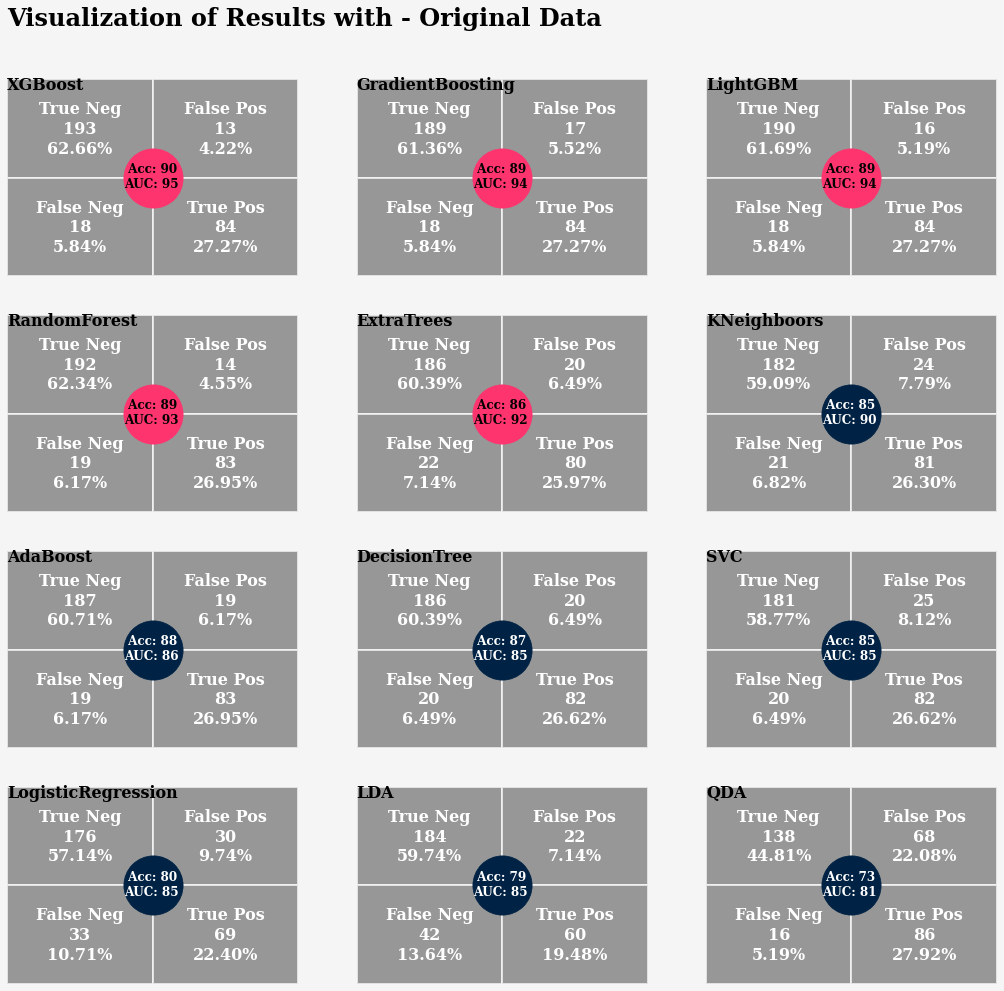

In [39]:
multi_visualize(data = [res_df], vmin=30,vmax = 100)

<h1 style = "font-size:60px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; text-align: center; border-radius: 50px 50px;">6. Credits:
</h1>


#### 1. [hyperparameter-tuning](https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6)
#### 2. Categorising -> [Insulin](#https://labpedia.net/insulin-level-insulin-assay/), [BloodPressure](#https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers)
#### 3. [Visualization](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
#### 4. [Case Study](https://machinelearningmastery.com/case-study-predicting-the-onset-of-diabetes-within-five-years-part-1-of-3/)

#### Also, I learnt the most of the Visualization techniques used in this Notebook from [Bhuvan Chennoju](https://www.kaggle.com/bhuvanchennoju), do check his awesome work.

<br>
<h1 style = "font-size:50px; font-family: cursive ; font-weight : normal; background-color: #DA0037 ; color : white ; border-radius: 50px 50px;text-align: center;">   If you Liked my notebook, Please leave an UPVOTE!!</h1>
<p style = "text-align:center;">